<a href="https://colab.research.google.com/github/snehavalabailu/snehavalabailu/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
#import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#set options to display max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#the project was run on google colab with the dataset stored in google drive. Mounting the drive to read the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory data analysis

### Data Understanding

In [ ]:
#reading the dataset stored in google drive. below lines need to be updated based on the storage location of the dataset.
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
#df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#looking at the basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking if any of the columns contain null entries
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We observe there is no missing data in the dataset. All columns are of numerical type. The columns V1 to V28 are PCA variables masking the actual data for security and privacy reasons. However, data in numerical format is best suited for model building. 

Let's look at the statistical details of the columns

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Visualization

Here we will observe the distribution of our classes

In [ ]:
#divide the target variable into the two classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

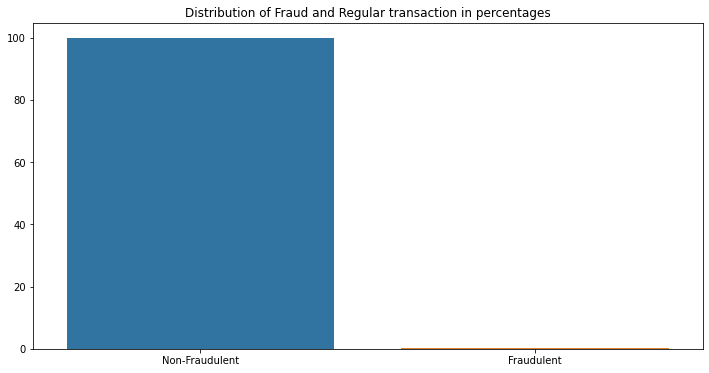

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, ax = plt.subplots(figsize =(12,6))
ax = sns.barplot(x = ['Non-Fraudulent','Fraudulent'],y=[normal_share,fraud_share])
#ax.bar_label(ax.containers[0],fmt='%.2f')
plt.title("Distribution of Fraud and Regular transaction in percentages")
plt.show()

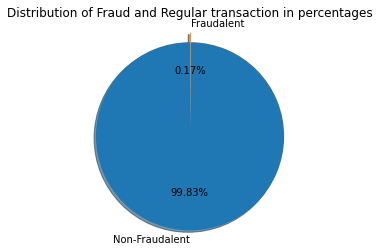

In [ ]:
#visualize the class distribution in pie chart
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Fraud and Regular transaction in percentages')
plt.show()

We observe only 0.17% of the data comprises of fraudulent transactions. The dataset is highly imbalanced. We need to take appropriate measures to ensure the model doesn't overfit and label every transaction as non-fradulent. If we were to assess such a model would actually give very high accuracy which would be inaccurate. This is the reason, the models built for our use case would have to be measured against metrics such as F1 score which is very reliable for imbalanced datasets.

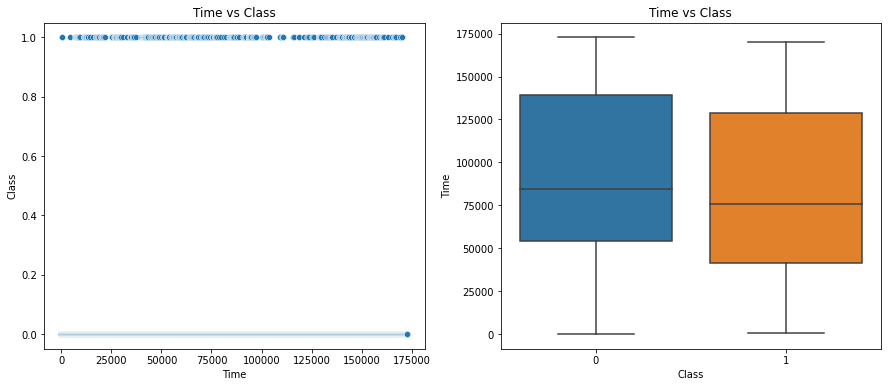

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#Lets plot a scatter plot and a boxplot to better observe the distribution

plt.figure(figsize=(15,6));
plt.subplot(1,2,1)
plt.title("Time vs Class")
sns.scatterplot(data = df,x = "Time",y="Class")


plt.subplot(1,2,2)
sns.boxplot(data = df,y="Time",x="Class")
plt.title("Time vs Class")
plt.show()

We don't really observe any pattern in the way Time is correlated to the class of the transaction. This coulmn can be dropped later for the model building stage                                                                                                                                                                                                                                                                                                                                                                                                                                                   

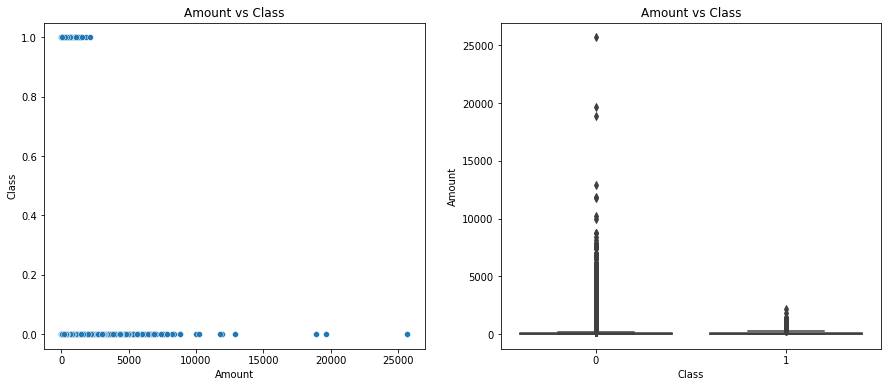

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
#Lets plot a scatter plot and a boxplot to better observe the distribution

plt.figure(figsize=(15,6));
plt.subplot(1,2,1)
plt.title("Amount vs Class")
sns.scatterplot(data = df,x = "Amount",y="Class")


plt.subplot(1,2,2)
sns.boxplot(data = df,y="Amount",x="Class")
plt.title("Amount vs Class")
plt.show()

We can observe while transactions of high value are quite low, most of the fraudulent transactions lie below 5000. This could be due to multiple reasons, the bank could have multi-factor authentication for high amount transactions, the data just doesn't include any fraudulent transaction of such large amount. In either case, we can gather that Amount is a useful column

#### Correlation Matrix

Lets observe the correlation between the features

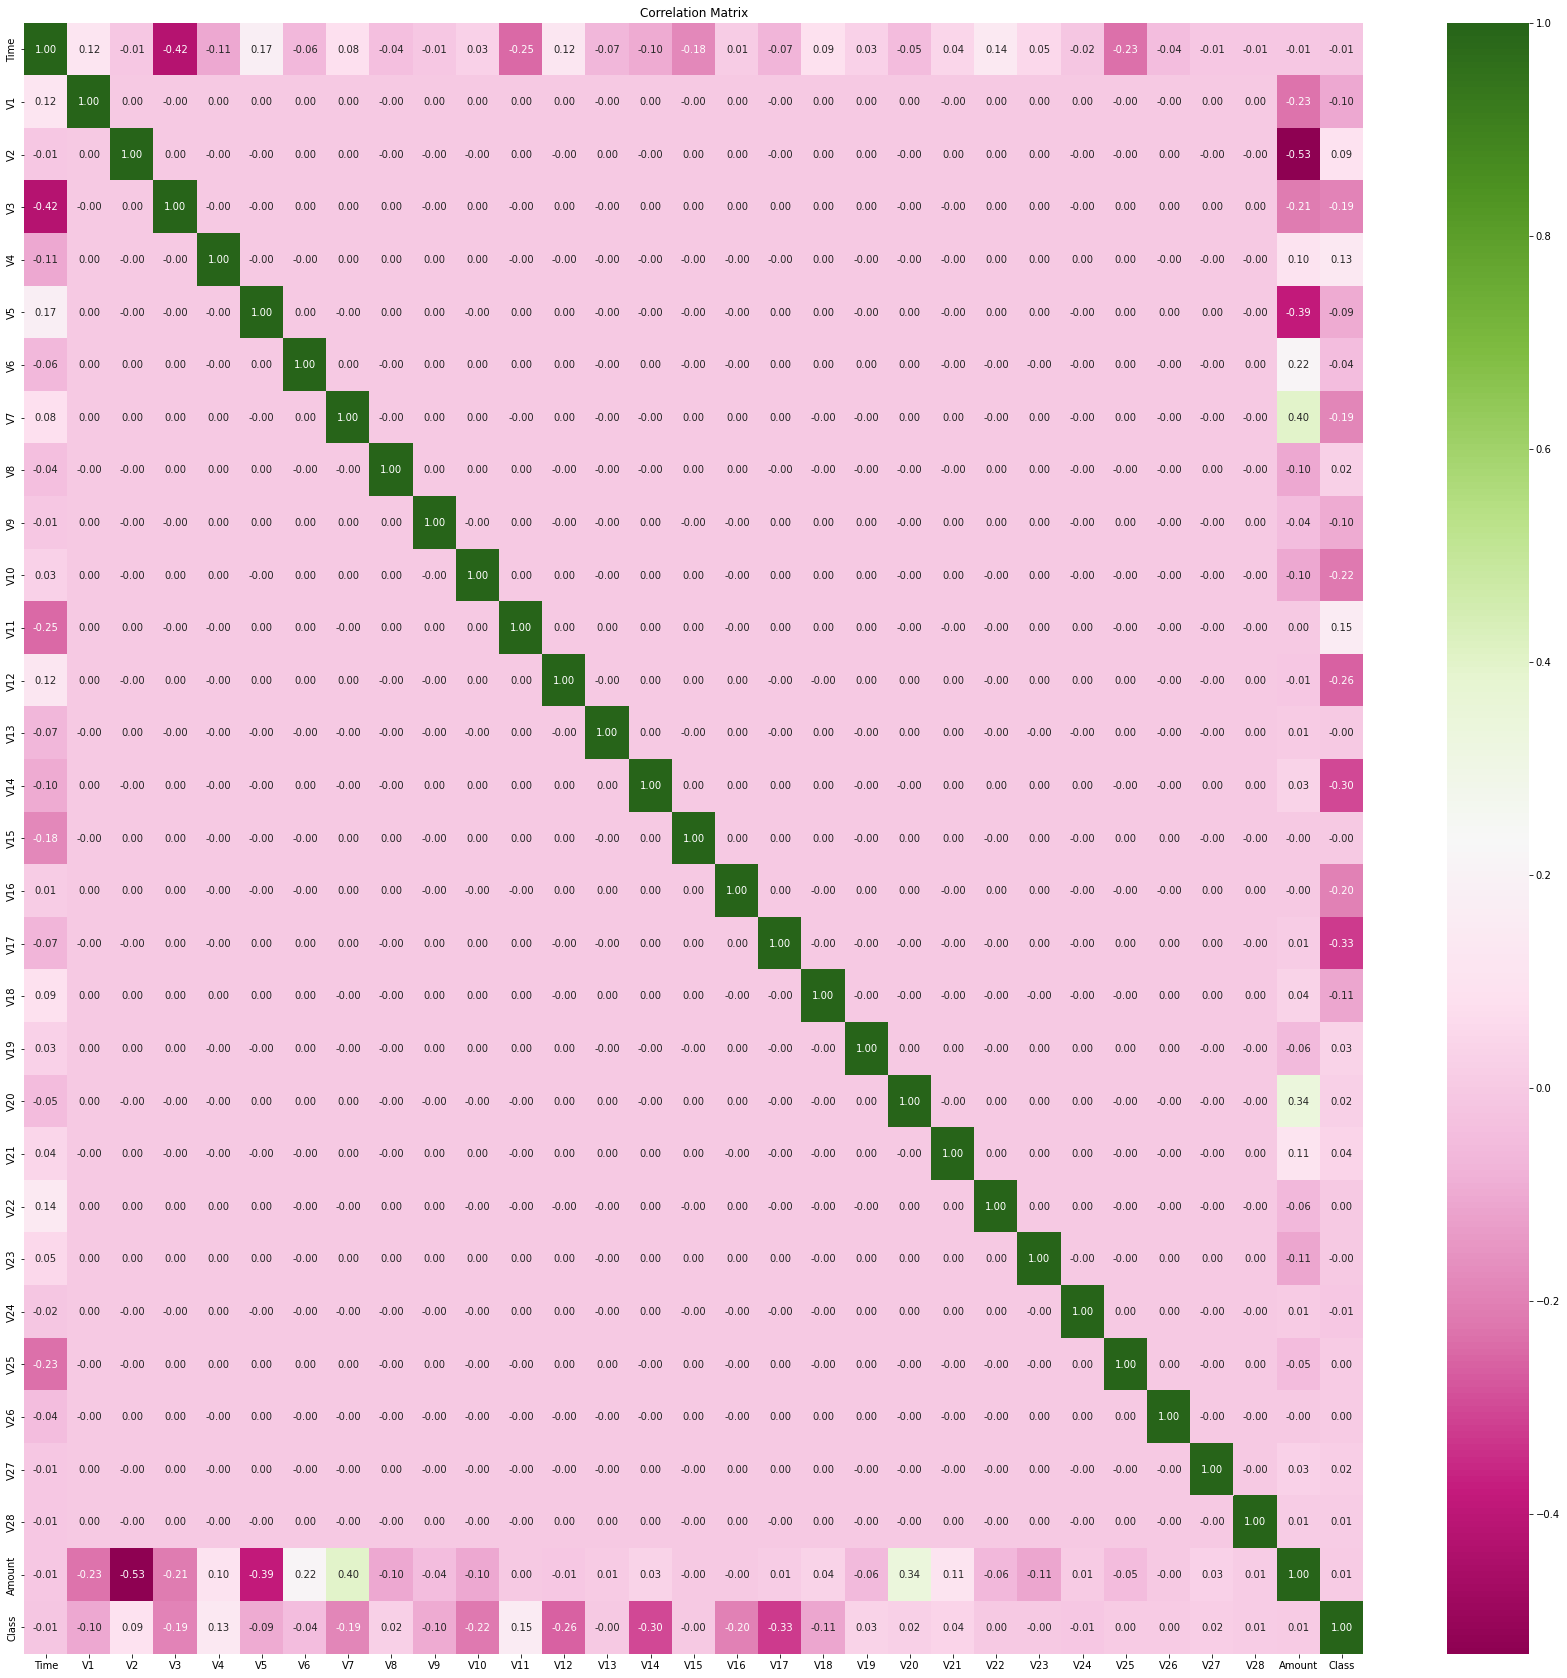

In [ ]:
#for Original Data frame
plt.figure(figsize=(30,30))

sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="PiYG")
plt.title("Correlation Matrix")
plt.show()


Observation :

- V2 has strong negative correlation with Amount
- V7 and V20 has positive correlation with Amount
- Although weak, the columns V2, V4, V11 have positive correlation with Class
- Rest of the columns are negatively correlated. 

This means as value in V2,V4,V11 increase, the transaction is more likely to be fraud.  We can further verify this with feature importance obtained after model building.

In [ ]:
#Let's plot the correlation with the target variable
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(10)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


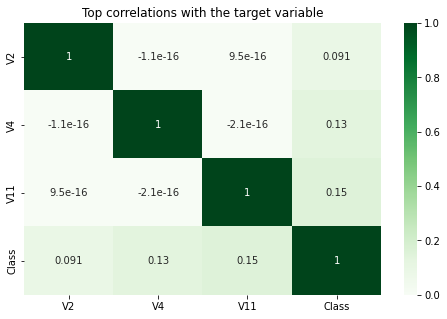

In [ ]:
#lets visualize the top correlations with the target variable
cor = df.corr()
top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True,cmap = "Greens")
plt.title("Top correlations with the target variable")
plt.show()

In [ ]:
# Drop unnecessary columns
#Lets drop the column "Time" since it is of no use to our model. 
df = df.drop("Time",axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preperation

### Splitting the data into train & test data

In [ ]:
#store target variable into y and 
y = df.pop('Class')
X = df

Since our data is imbalanced and we have very few records for Fraud cases, we use <b> stratified splitting </b> for the test and train split. This ensures both train and test sets have similar distribution of both classes, making the testing more reliable.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(199364, 29) (85443, 29) (199364,) (85443,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of all variables to check the skewness

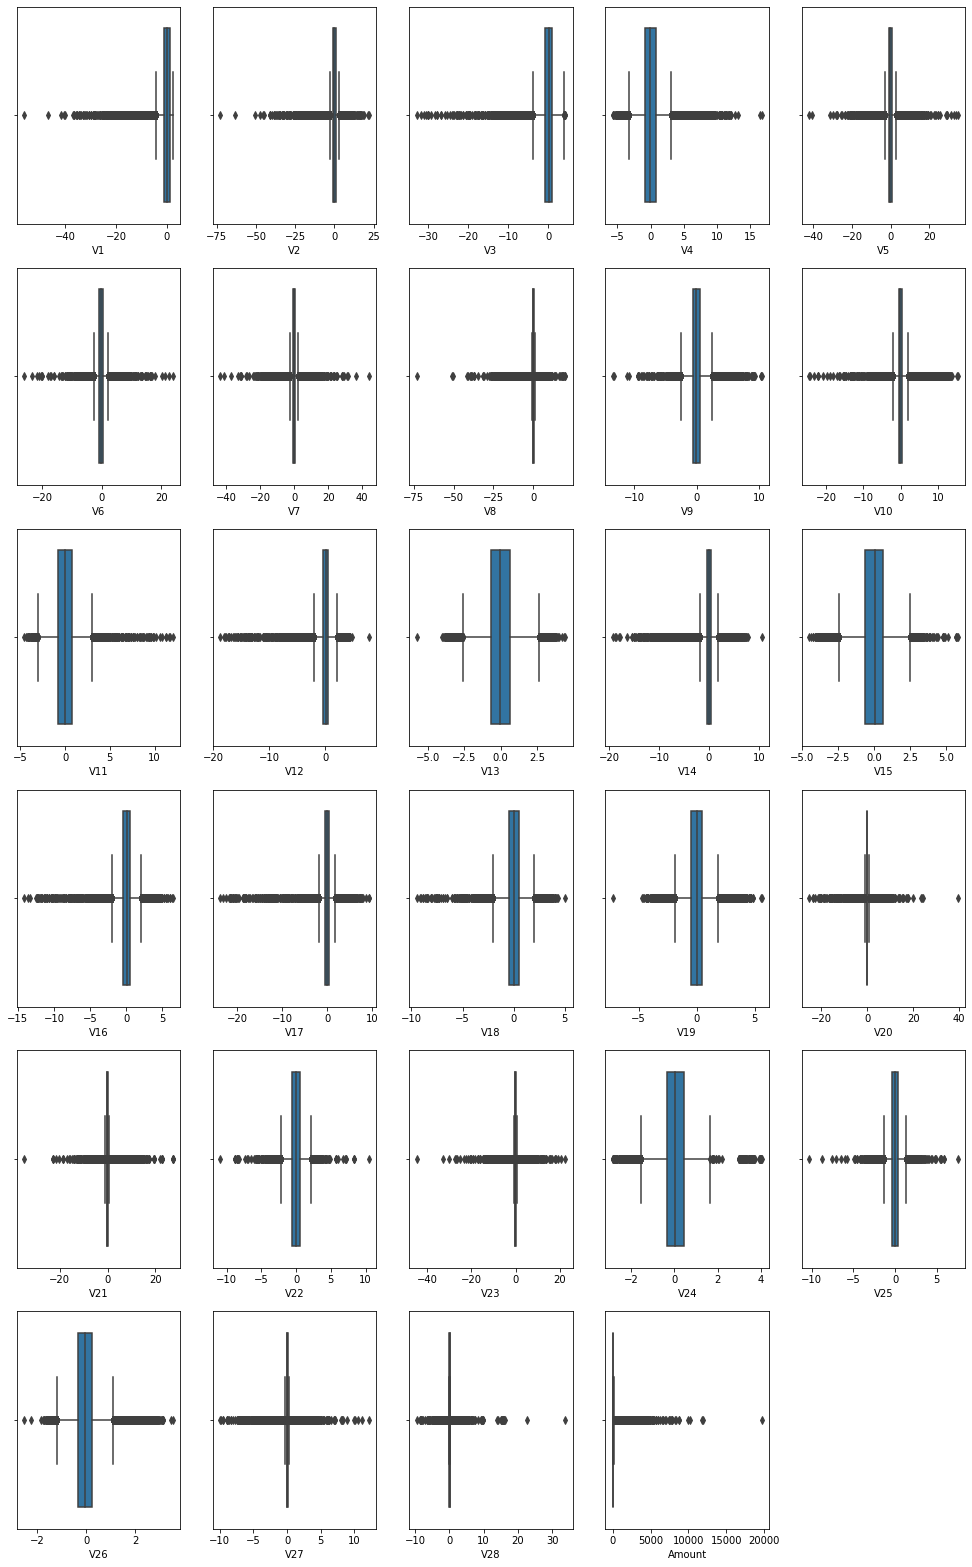

In [ ]:

k=0
cols = df.columns
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.boxplot(X_train[col])



Lets plot the distribution of the columns to check the skewness of the data

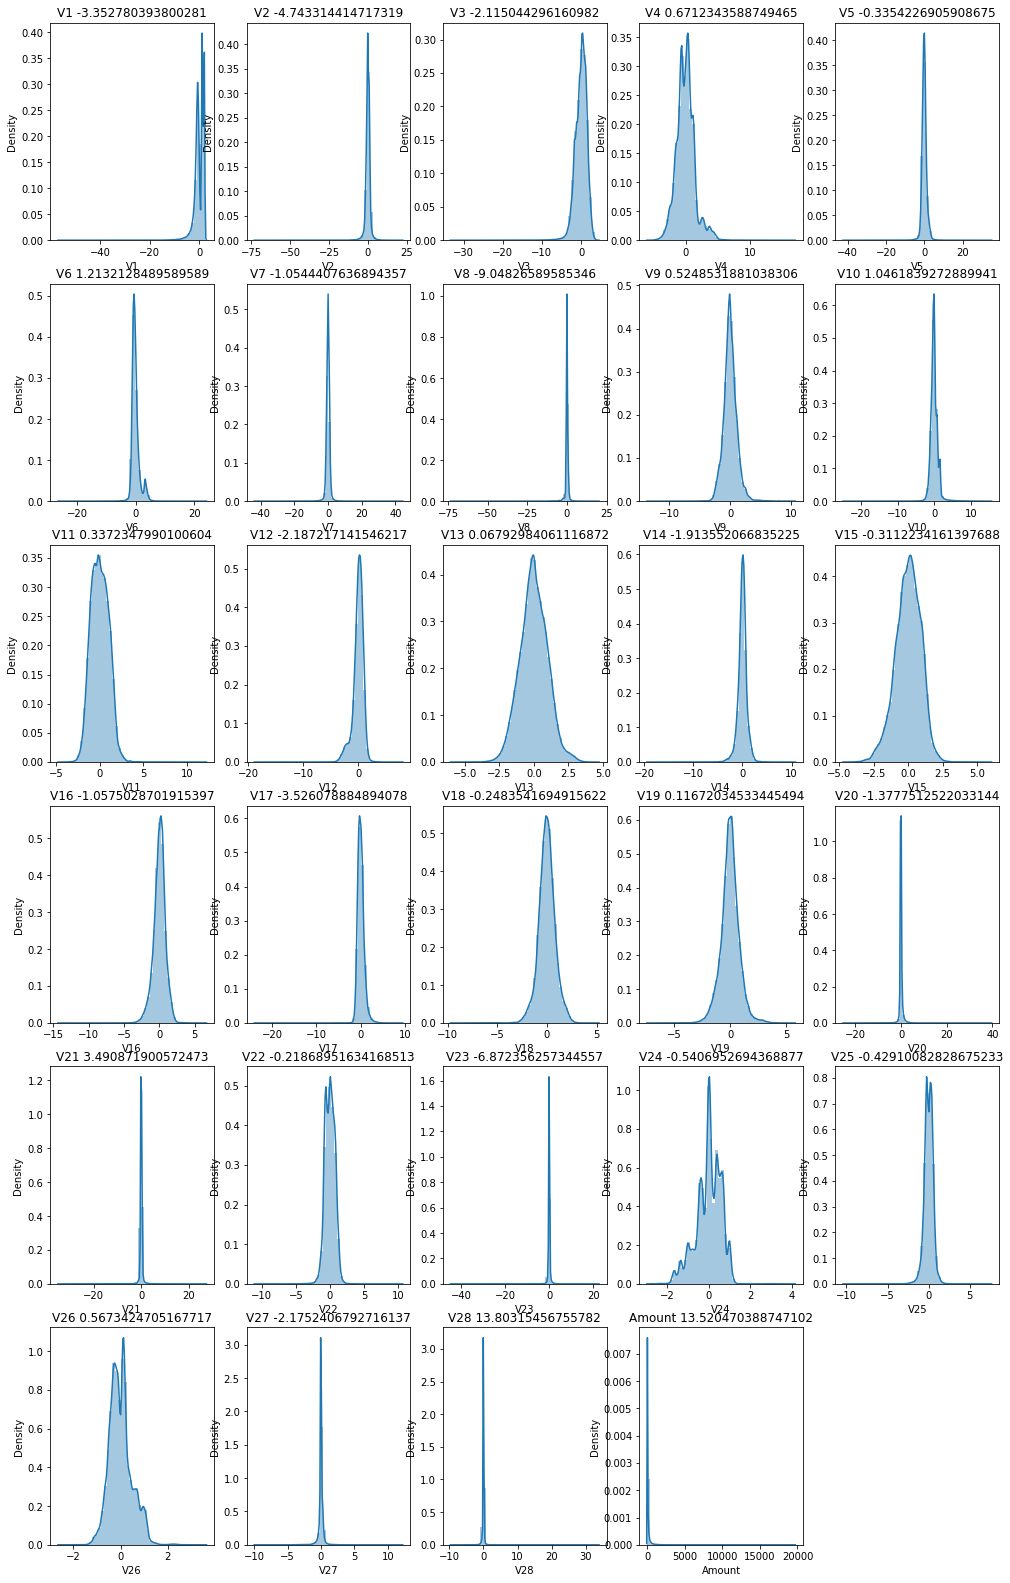

In [ ]:
#looking at the distribution of data in the columns

k=0
cols = df.columns
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We make the below observation about the distribution of the variables
- The distribution is skewed for most of the variables. Which means we would have to treat them for outliers.
- The columns V9, V10, V16 have approximately normal distribution curve
- The aveage amount spent is 88$

Most Machine learning models work well with normally distributed data. We will use power transformer package provided by sklearn to make the distribution more gaussian

### Treating skewness in the data

In [ ]:
#retain headers for numpy to dataframe conversion after transformation
column_names = X_train.columns

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
#boxcox method strictly works with postive values. We have observed our data also consists negative values. We will hence be using 'Yeo-Johnosn' method instead
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train = pt.fit_transform(X_train)
#convert numpy array back to dataset
X_train = pd.DataFrame(X_train,columns = column_names)

#transform the test dataset
X_test = pt.transform(X_test)
X_test = pd.DataFrame(X_test,columns = column_names)

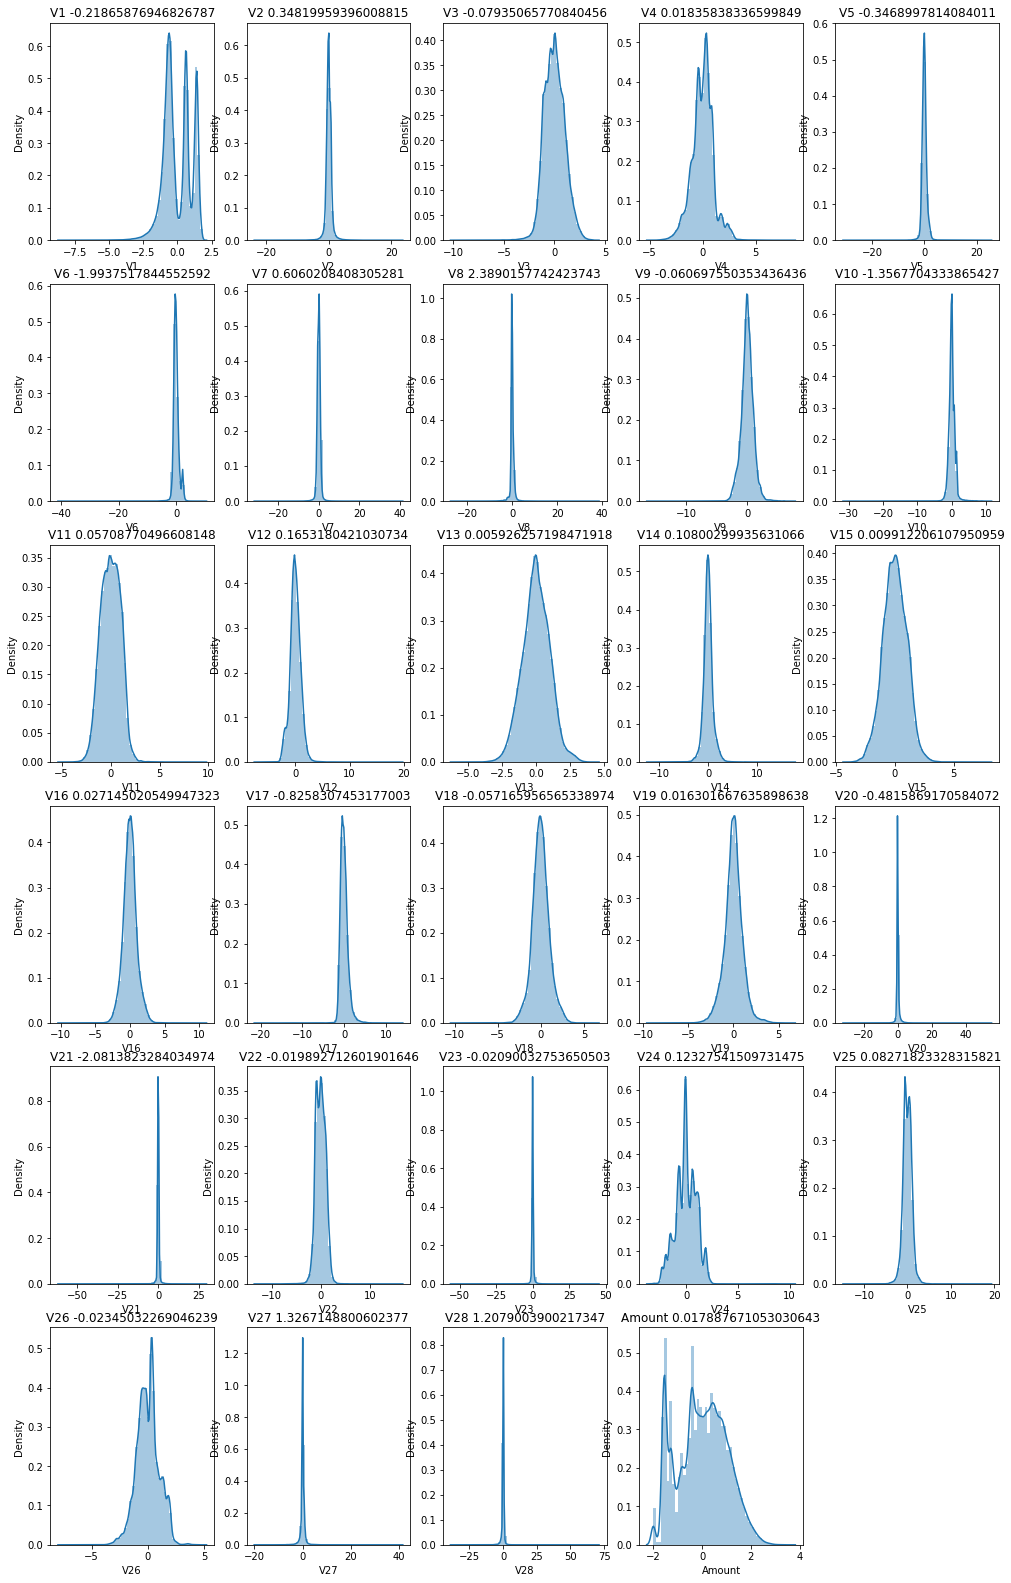

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
#looking at the distribution of data in the columns

k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

By comparing the graphs and the skew value printed on top of each of the graph, we can observe the skewness has reduced.

### Scaling the feature "Amount"

The columns V1 to V28 are anonymized through PCA. Since scaling is extremely important to be performed before PCA, we can assume these variables have already been scaled. We scale the column Amount

In [ ]:
#using standard scaler to scale the amount column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#scaling the amount column
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
#importing libraries required for the evaluation metrics
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

Functions that can be called for printing evaluation metrics after each model is built.

Since we have multiple model to be built, lets create reusable functions for evaluation metrics and model building.

In [ ]:
#function to plot the sensitivity, specificity and accuracy for different probability cut offs
def cutoff_plot(y_train,X_train,model):	
    y_train_predprob = model.predict_proba(X_train)[:,1]
    
    #dataframe with actual converted flag and predicted probabilities
    y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_predprob})
    #y_train_pred_log.head()
    
    #creating columns for different probability cut off
    numbers = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in numbers:
        y_train_pred_final[i] = y_train_pred_final.Fraud_Prob.map(lambda x : 1 if x>i else 0)
    
    #evaluation metrics for different cutoffs
    cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    for i in numbers:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'],grid=True,figsize=(10,6));
    plt.title("Metrics across different cut-offs")
    plt.show();

In [ ]:
#functions to compute confusion matrix and other metrics
def convert_percentage(val):
      return round(val*100,2)
    
def classifier_metrics(actual,predicted):
    #returns precision, recall and f1-score
    confusion = metrics.confusion_matrix(actual,predicted)
    #print("Confusion Matrix",confusion,sep="\n")
        
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    #using heatmap to visualize confusion matrix
    sns.heatmap(confusion,annot=True,fmt=".0f",cmap="Blues");
    
    plt.title("Confusion Matrix cut off")
    plt.xlabel("Predicted");
    plt.ylabel("Actual");
    plt.show();

    #print("-"*70)
    #print("\033[1m")
    #roc_value = roc_auc_score(actual,predicted)
    #print("ROC AUC Score",roc_value)
    #print("\033[0m") 

        
    #print("-"*70)
    #sensitivty/recall
    sensitivity = TP / float(TP+FN)
    print("Recall/Sensitivity - ",sensitivity)
    #print(convert_percentage(sensitivity),"% of the positive cases have been predicted correctly")
    
        
    #print("-"*70)
        
    #miss rate
    missrate = FN / float(FN+TP)
    #print("Miss Rate - ",missrate)
    #print(convert_percentage(missrate),"% of missed true positives")
    
    #print("-"*70)
    #f1 score
    f1score = metrics.f1_score(actual,predicted)
    print("F1 score -",f1score)
    
    #print("-"*90)
    #precision
    precision = metrics.precision_score(actual,predicted)
    print("Precision - ",precision)
    #print(convert_percentage(precision),"% of the positive instances correctly predicted as positive")
      
    #print("-"*70)

    
    #accuracy
    accuracy = metrics.accuracy_score(actual,predicted)
    print("Accuracy -",accuracy)
    
    #print("-"*70)
    
    #specificity
    specificity = TN / float(TN+FP)
    print("Specificity - ",specificity)
    #print(convert_percentage(specificity),"% of the negative cases have been predicted correctly")
    
    #print("-"*70)
    
    #false positive rate
    fpr = FP/ float(TN+FP)
    print("False Positive Rate - ",fpr)
    #print(convert_percentage(fpr),"% of the negative instances incorrectly classified as positive")
    
    print("-"*70)

    return precision,sensitivity,f1score


## Model Building
We write functions to build the required set of models on different dataset. Below are the highlights of all the models being built.

- Wherever possible, the <b> class weight </b>  parameter is set to compensate for the imbalance between the two classes
- <b> Stratified K Fold </b> method is used for cross validation. This ensures the class imbalance is maintained in all the folds created.
-<b> Randomized Grid Search CV </b> is used instead of the regular Grid Search. While both the methods explore the same set of parameters, the run time for randomized grid search is drastically lower for a dataset containing high number of datapoints.
- <b> ROC-AUC score </b> is used in the cross validation  to select the best model since it is independent of the threshold choosen.
- While we print the confusion matrix and related classification metrics such as precision, recall etc., these values are for the threshold 0.5 set by sklearn library by default. We hence compare the ROC-AUC score of different models to select the best one.
- The ROC-AUC score and threshold for each model is saved into a dataframe named "df_result" to help compare the different models built for different scenarios

<b> KNN Classifier Usage </b>

Even though we have built the function to build KNN classifier, we haven't used it since KNN classifier takes extremely long to build since the model has to compute the distance for each datapoint.

<b> SVM Classifier Usage </b>

The SVM Classifier has been only used for imbalance dataset. The time taken for this model for oversampled datasets was extremely high. The SVM classifier has hence only been used once.

In [ ]:
#import required libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import time

In [ ]:

#Create a dataframe to store results
df_results = pd.DataFrame(columns=['Case','Model','Threshold','Train AUC-ROC score','Test AUC-ROC score'])

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def buildLogisticRegression(df_results,case,X_train,y_train,X_test,y_test):
  

  sk = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)

  lr = LogisticRegression(class_weight={1:0.01, 0: 0.9})
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge


# Create random grid search object

  clf = RandomizedSearchCV(estimator=lr, param_distributions = param_grid, cv = sk,scoring='roc_auc', verbose=True, n_jobs=-1,random_state=10)


  # Fit on data
  begin = time.time()
  best_clf = clf.fit(X_train,y_train)
  end = time.time()
  best_log = best_clf.best_estimator_
  
  print("="*80)
  print(best_log)
  print(" ")
  print("Time taken to build the model : {0} seconds".format(end-begin))

  #evaluate on train data
  print("="*80)
  print(" ")
  y_train_predprob = best_log.predict_proba(X_train)[:,1]
  y_train_pred = best_log.predict(X_train)
  plt.rcParams['figure.figsize'] = [6.4, 4.8]
  print("Classifier metrics for Logistic Regression on train data")
  pre_train, rec_train, f1_train = classifier_metrics(y_train,y_train_pred)

  #ROC for train data
  
  plot_roc_curve(best_log, X_train, y_train)
  plt.title("ROC Curve for train data - Logistic Regression");
  plt.show()
  roc_value_train = roc_auc_score(y_train,y_train_predprob)

  fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob)
  threshold = thresholds[np.argmax(tpr-fpr)]

  #evaluate on test data

  y_test_predprob = best_log.predict_proba(X_test)[:,1]
  y_test_pred = best_log.predict(X_test)

  print("="*80)
  print(" ")
  print("Classifier metrics for Logistic Regression on test data")
  pre_test, rec_test, f1_test = classifier_metrics(y_test,y_test_pred)

  #ROC for test data
  plt.rcParams['figure.figsize'] = [6.4, 4.8]
  plot_roc_curve(best_log, X_test, y_test)
  plt.title("ROC Curve for test data - Logistic Regression");

  

  roc_value_test = roc_auc_score(y_test,y_test_predprob)

  #print("="*80)
  print(" ")  
  print("Saving results on test dataset")
  #df_results = df_results.append(pd.DataFrame({"Case":case,"Model":"Logistic Regression","Test- F1 score":f1_test,"roc_value":roc_value,"Threshold":threshold}, index=[0]),ignore_index= True)
  df_results = df_results.append([{"Case":case,"Model":"Logistic Regression","Threshold":threshold,"Train AUC-ROC score": roc_value_train,"Test AUC-ROC score":roc_value_test}],ignore_index=True)
 

  print(df_results.to_markdown())
  print("-"*80)
  return df_results, best_log

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def buildDecisionTreeClassifier(df_results,case,X_train,y_train,X_test,y_test):
  sk = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)
  max_depth = [10,15,20,25,30]
  min_samples_leaf = [5,10,15,20,25]
  param_grid = {'max_depth': max_depth}

  dt = DecisionTreeClassifier(class_weight={0:0.90,1:0.01})
  dt_grid = RandomizedSearchCV(estimator=dt, 
                        param_distributions=param_grid, 
                        cv=sk, scoring='roc_auc', 
                        n_jobs=-1,
                        return_train_score=True, 
                        verbose=1
                        )
  
  begin = time.time()
  dt_grid.fit(X_train,y_train)
  end = time.time()

  best_dt = dt_grid.best_estimator_

  print("="*80)
  print(best_dt)
  print(" ")
  print("Time taken to build the model : {0} seconds".format(end-begin))

  #evaluate on train data
  print("="*80)
  print(" ")
  y_train_predprob = best_dt.predict_proba(X_train)[:,1]
  y_train_pred = best_dt.predict(X_train)
  print("Classifier metrics for Decision Tree on train data")
  pre_train, rec_train, f1_train = classifier_metrics(y_train,y_train_pred)

  #ROC for train data
  plt.rcParams['figure.figsize'] = [6.4, 4.8]
  plot_roc_curve(best_dt, X_train, y_train)
  plt.title("ROC Curve for train data - Decision Tree");
  plt.show()
  fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob)
  threshold = thresholds[np.argmax(tpr-fpr)]
  roc_value_train = roc_auc_score(y_train,y_train_predprob)

  #evaluate on test data

  y_test_predprob = best_dt.predict_proba(X_test)[:,1]
  y_test_pred = best_dt.predict(X_test)

  print("="*80)
  print(" ")
  print("Classifier metrics for Decision Tree on test data")
  pre_test, rec_test, f1_test = classifier_metrics(y_test,y_test_pred)

  #ROC for test data
  plot_roc_curve(best_dt, X_test, y_test)
  plt.title("ROC Curve for test data - Decision Tree");



  roc_value_test = roc_auc_score(y_test,y_test_predprob)
  print("="*80)
  print(" ")
  print("Saving results on test dataset")
  
  df_results = df_results.append([{"Case":case,"Model":"Decision Tree","Threshold":threshold,"Train AUC-ROC score": roc_value_train,"Test AUC-ROC score":roc_value_test}],ignore_index=True)

  print(df_results)
  return df_results,best_dt

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def buildRandomForestClassifier(df_results,case,X_train,y_train,X_test,y_test):
  sk = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)
  max_depth = [10,15,20,25,30]
  min_samples_leaf = [5,10,15,20,25]
  param_grid = {'max_depth': max_depth}

  rf = RandomForestClassifier(class_weight={0:0.90,1:0.01})
  rf_grid = RandomizedSearchCV(estimator=rf, 
                        param_distributions=param_grid, 
                        cv=sk, scoring='roc_auc', 
                        n_jobs=-1,
                        return_train_score=True, 
                        verbose=1
                        )
  
  begin = time.time()
  rf_grid.fit(X_train,y_train)
  end = time.time()

  best_rf = rf_grid.best_estimator_

  print("="*80)
  print(best_rf)
  print(" ")
  print("Time taken to build the model : {0} seconds".format(end-begin))
  #evaluate on train data
  print("="*80)
  print(" ")
  y_train_predprob = best_rf.predict_proba(X_train)[:,1]
  y_train_pred = best_rf.predict(X_train)
  print("Classifier metrics for Random Forest on train data")
  pre_train, rec_train, f1_train = classifier_metrics(y_train,y_train_pred)

  #ROC for train data
  plt.rcParams['figure.figsize'] = [6.4, 4.8]
  plot_roc_curve(best_rf, X_train, y_train)
  plt.title("ROC Curve for train data - Random Forest");
  plt.show()
  fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob)
  threshold = thresholds[np.argmax(tpr-fpr)]  
  roc_value_train = roc_auc_score(y_train,y_train_predprob)
  #evaluate on test data

  y_test_predprob = best_rf.predict_proba(X_test)[:,1]
  y_test_pred = best_rf.predict(X_test)

  print("="*80)
  print(" ")  
  print("Classifier metrics for Random Forest on test data")
  pre_test, rec_test, f1_test = classifier_metrics(y_test,y_test_pred)

  #ROC for test data
  plot_roc_curve(best_rf, X_test, y_test)
  plt.title("ROC Curve for test data - Random Forest");


  roc_value_test = roc_auc_score(y_test,y_test_predprob)

  #print("="*80)
  print(" ")  
  print("Saving results on test dataset")
  
  df_results = df_results.append([{"Case":case,"Model":"Random Forest","Threshold":threshold,"Train AUC-ROC score": roc_value_train,"Test AUC-ROC score":roc_value_test}],ignore_index=True)

  print(df_results.to_markdown())
  return df_results,best_rf



### SVM 

In [ ]:
from sklearn.svm import SVC

def buildSVClassifier(df_results,case,X_train,y_train,X_test,y_test):
  #sk = StratifiedKFold(n_splits=3, random_state=4, shuffle=True)
  #param_grid = {'C': [0.1, 10],
  #            'gamma': [1, 0.01],
  #            'kernel': ['rbf']}
  svc_clf = SVC(kernel='sigmoid' , probability=True,class_weight={0:0.90,1:0.01})
  #svc_grid = GridSearchCV(svc_clf, param_grid, refit = True, verbose = 3)

  
  begin = time.time()
  svc_clf.fit(X_train,y_train)
  end = time.time()

  best_svc = svc_clf

  print("="*80)
  print(best_svc)
  print(" ")
  print("Time taken to build the model : {0} seconds".format(end-begin))

  #evaluate on train data
  print("="*80)
  print(" ")
  y_train_predprob = best_svc.predict_proba(X_train)[:,1]
  y_train_pred = best_svc.predict(X_train)
  
  print("Classifier metrics for SVM on train data")
  pre_train, rec_train, f1_train = classifier_metrics(y_train,y_train_pred)

  #ROC for train data
  plt.rcParams['figure.figsize'] = [6.4, 4.8]
  plot_roc_curve(best_svc, X_train, y_train)
  plt.title("ROC Curve for train data - SVM");
  plt.show()
  fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob)
  threshold = thresholds[np.argmax(tpr-fpr)]
  roc_value_train = roc_auc_score(y_train,y_train_predprob)

  #evaluate on test data

  y_test_predprob = best_svc.predict_proba(X_test)[:,1]
  y_test_pred = best_svc.predict(X_test)

  print("="*80)
  print(" ")  
  print("Classifier metrics for SVM on test data")
  pre_test, rec_test, f1_test = classifier_metrics(y_test,y_test_pred)

  #ROC for test data
  plot_roc_curve(best_svc, X_test, y_test)
  plt.title("ROC Curve for test data - SVM");


  roc_value_test = roc_auc_score(y_test,y_test_predprob)

  #print("="*80)
  print(" ")  
  print("Saving results on test dataset")
  df_results = df_results.append([{"Case":case,"Model":"SVM","Threshold":threshold,"Train AUC-ROC score": roc_value_train,"Test AUC-ROC score":roc_value_test}],ignore_index=True)
  print(df_results.to_markdown())


  return df_results,best_svc



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def buildKNNClassifier(df_results,case,X_train,y_train,X_test,y_test):
  sk = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)
  param_grid = { 'n_neighbors' : [5,7,9,11]}

  knn_clf = KNeighborsClassifier()
  knn_grid = RandomizedSearchCV(estimator=knn_clf, 
                        param_distributions=param_grid, 
                        cv=sk, scoring='roc_auc', 
                        n_jobs=-1,
                        return_train_score=True, 
                        verbose=1
                        )
  
  begin = time.time()
  knn_grid.fit(X_train,y_train)
  end = time.time()

  best_knn = knn_grid.best_estimator_
  print("="*80)
  print(best_knn)
  print(" ")
  print("Time taken to build the model : {0} seconds".format(end-begin))

  #evaluate on train data

  y_train_predprob = best_knn.predict_proba(X_train)[:,1]
  y_train_pred = best_knn.predict(X_train)

  print("="*80)
  print(" ")
  print("Classifier metrics for KNN on train data")
  pre_train, rec_train, f1_train = classifier_metrics(y_train,y_train_pred)

  #ROC for train data
  
  plot_roc_curve(best_knn, X_train, y_train)
  plt.title("ROC Curve for train data - KNN");
  plt.show()

  fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob)
  threshold = thresholds[np.argmax(tpr-fpr)]
  roc_value_train = roc_auc_score(y_train,y_train_predprob)
  #evaluate on test data

  y_test_predprob = best_knn.predict_proba(X_test)[:,1]
  y_test_pred = best_knn.predict(X_test)

  print("="*80)
  print(" ")
  print("Classifier metrics for KNN on test data")
  pre_test, rec_test, f1_test = classifier_metrics(y_test,y_test_pred)

  #ROC for test data
  plt.rcParams['figure.figsize'] = [6.4, 4.8]
  plot_roc_curve(best_knn, X_test, y_test)
  plt.title("ROC Curve for test data - KNN");

  roc_value_test = roc_auc_score(y_test,y_test_predprob)

  #print("="*80)
  print(" ")
  print("Saving results on test dataset")
  df_results = df_results.append([{"Case":case,"Model":"KNN","Threshold":threshold,"Train AUC-ROC score": roc_value_train,"Test AUC-ROC score":roc_value_test}],ignore_index=True)

  print(df_results.to_markdown())

  return df_results,best_knn



### XGBoost

In [ ]:
from xgboost import XGBClassifier
def buildXGBClassifier(df_results,case,X_train,y_train,X_test,y_test):
  sv = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
  param_grid = { 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
 #,'n_estimators':[110,120,130]
 }  
  #, 'min_child_weight': min_child_weight, 'max_depth':max_depth, 'objective': objective, 'scale_pos_weight':scale_pos_weight}

  xgb = XGBClassifier(eval_metric='logloss', objective='binary:logistic')

  grid_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=sv, scoring='roc_auc', n_jobs=-1, verbose=1)

  begin = time.time()
  grid_xgb.fit(X_train,y_train)
  end = time.time()

  best_xgb = grid_xgb.best_estimator_
  print("="*80)
  print(best_xgb)
  print(" ")
  print("Time taken to build the model : {0} seconds".format(end-begin))  
  #evaluate on train data

  y_train_predprob = best_xgb.predict_proba(X_train)[:,1]
  y_train_pred = best_xgb.predict(X_train)
  print("="*80)
  print(" ")  
  print("Classifier metrics for XGB on train data")
  pre_train, rec_train, f1_train = classifier_metrics(y_train,y_train_pred)

  #ROC for train data
  plt.rcParams['figure.figsize'] = [6.4, 4.8]
  plot_roc_curve(best_xgb, X_train, y_train)
  plt.title("ROC Curve for train data - XGB");
  plt.show()

  fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob)
  threshold = thresholds[np.argmax(tpr-fpr)]
  roc_value_train = roc_auc_score(y_train,y_train_predprob)
  #evaluate on test data

  y_test_predprob = best_xgb.predict_proba(X_test)[:,1]
  y_test_pred = best_xgb.predict(X_test)

  print("="*80)
  print(" ")  
  print("Classifier metrics for XGB on test data")
  pre_test, rec_test, f1_test = classifier_metrics(y_test,y_test_pred)

  #ROC for test data
  plot_roc_curve(best_xgb, X_test, y_test)
  plt.title("ROC Curve for test data - XGB");


  roc_value_test = roc_auc_score(y_test,y_test_predprob)

  #print("="*80)
  print(" ")  
  print("Saving results on test dataset")
  df_results = df_results.append([{"Case":case,"Model":"XG Boost","Threshold":threshold,"Train AUC-ROC score": roc_value_train,"Test AUC-ROC score":roc_value_test}],ignore_index=True)
  print(df_results.to_markdown())


  return df_results,best_xgb


## Imbalanced Datasets.

Models built
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
- XGBoost

### Logistic Regression with Imbalanced dataset

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.5s finished


LogisticRegression(C=0.1, class_weight={0: 0.9, 1: 0.01}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Time taken to build the model : 33.98573923110962 seconds
 
Classifier metrics for Logistic Regression on train data


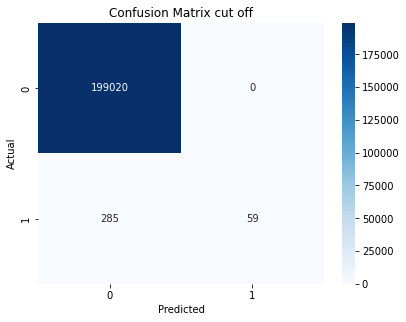

Recall/Sensitivity -  0.17151162790697674
F1 score - 0.29280397022332505
Precision -  1.0
Accuracy - 0.9985704540438595
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


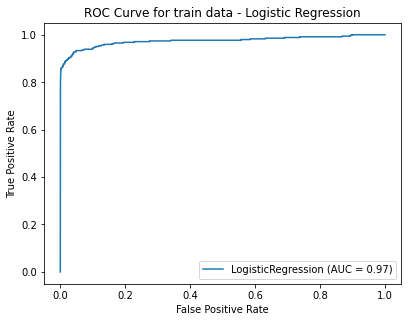

 
Classifier metrics for Logistic Regression on test data


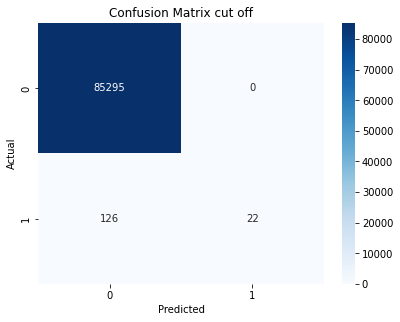

Recall/Sensitivity -  0.14864864864864866
F1 score - 0.25882352941176473
Precision -  1.0
Accuracy - 0.9985253326779256
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case            | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:----------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
--------------------------------------------------------------------------------


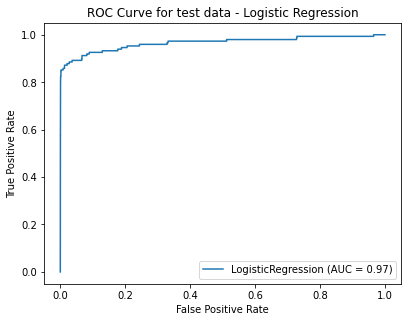

In [ ]:
df_results,best_log_im = buildLogisticRegression(df_results,"Imbalanced Data",X_train,y_train,X_test,y_test)

The model has performed considerably well. The gap between the train and test score is also less. However, let us check other models to see if we can score above 0.97 AUC-ROC Score.

### Decision Tree with Imbalanced dataset

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.9, 1: 0.01},
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
 
Time taken to build the model : 255.23622751235962 seconds
 
Classifier metrics for Decision Tree on train data


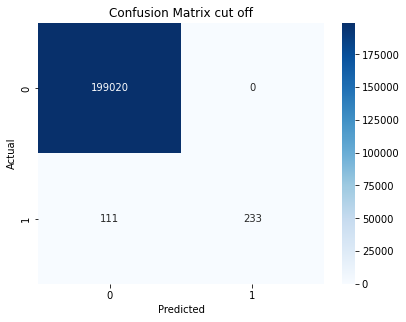

Recall/Sensitivity -  0.6773255813953488
F1 score - 0.8076256499133448
Precision -  1.0
Accuracy - 0.9994432294697136
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


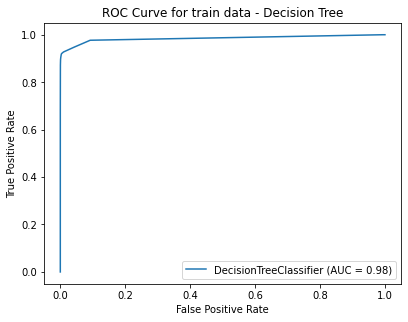

 
Classifier metrics for Decision Tree on test data


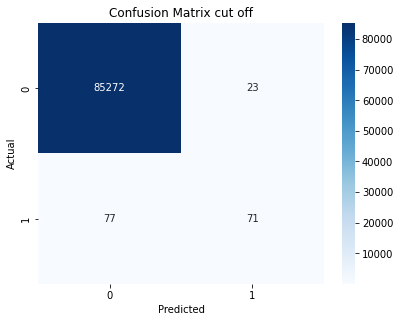

Recall/Sensitivity -  0.4797297297297297
F1 score - 0.5867768595041323
Precision -  0.7553191489361702
Accuracy - 0.9988296291094648
Specificity -  0.9997303476170936
False Positive Rate -  0.00026965238290638374
----------------------------------------------------------------------
 
Saving results on test dataset
              Case                Model  Threshold  Train AUC-ROC score  \
0  Imbalanced Data  Logistic Regression   0.000024             0.974339   
1  Imbalanced Data        Decision Tree   0.000022             0.984746   

   Test AUC-ROC score  
0            0.965798  
1            0.885370  


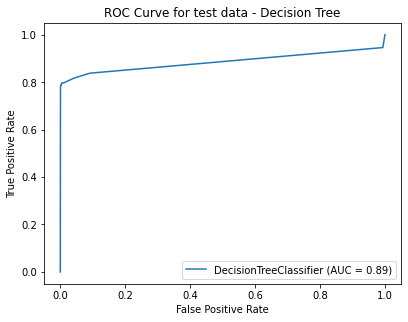

In [ ]:
df_results,best_dt_im = buildDecisionTreeClassifier(df_results,"Imbalanced Data",X_train,y_train,X_test,y_test)

The model took quite long compared to logistic regression and is clearly overfitting. The main advantage Decision tree has is the interpretability. However, in our case, the variables are already anonymized through PCA. Apart from identifying the top variables we can't really interpret much.

## Random Forest with Imbalanced dataset

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 44.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.01}, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
 
Time taken to build the model : 2861.1116807460785 seconds
 
Classifier metrics for Random Forest on train data


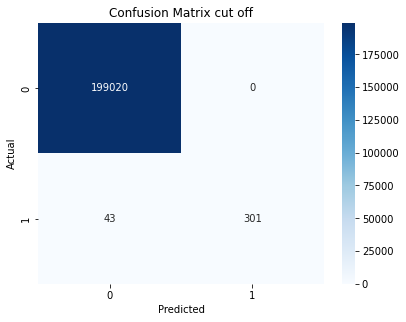

Recall/Sensitivity -  0.875
F1 score - 0.9333333333333333
Precision -  1.0
Accuracy - 0.9997843141188981
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


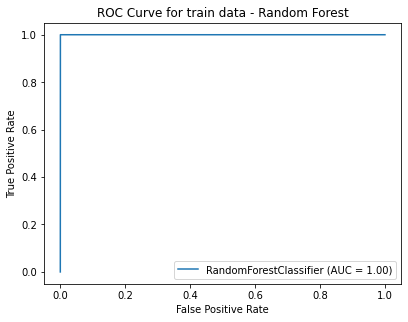

 
Classifier metrics for Random Forest on test data


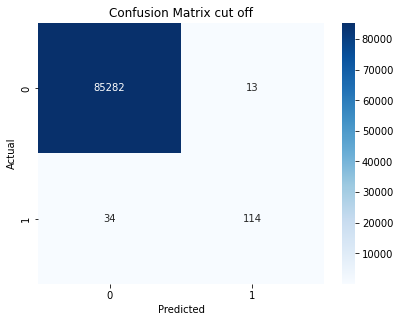

Recall/Sensitivity -  0.7702702702702703
F1 score - 0.829090909090909
Precision -  0.8976377952755905
Accuracy - 0.9994499256814484
Specificity -  0.9998475877835746
False Positive Rate -  0.00015241221642534733
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case            | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:----------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data | Random Forest       | 0.080007    |              0.999992 |             0.970784 |


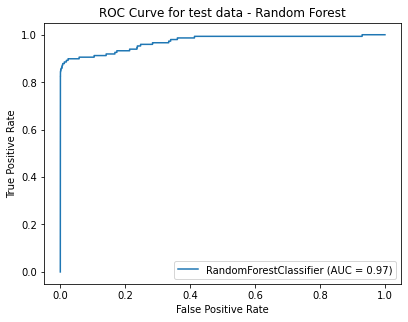

In [ ]:
df_results,best_rf_im = buildRandomForestClassifier(df_results,"Imbalanced Data",X_train,y_train,X_test,y_test)

While the model performed better than logistic regression model with 0.99 AUC-ROC score, the gap between train and test set is larger than that of logistic regression. This is mainly because we are using an imbalanced dataset.

### SVM with Imbalanced Dataset

The SVM classifier took too long to run with the hyperparameter tuning. We hence modified the model to run with the default parameters. Lets look at the metrics.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.9, 1: 0.01},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='sigmoid', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
 
Time taken to build the model : 64.85298919677734 seconds
 
Classifier metrics for SVM on train data


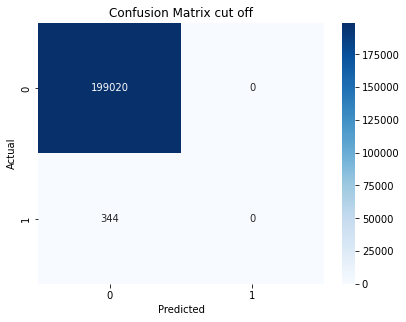

Recall/Sensitivity -  0.0
F1 score - 0.0
Precision -  0.0
Accuracy - 0.9982745129511847
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


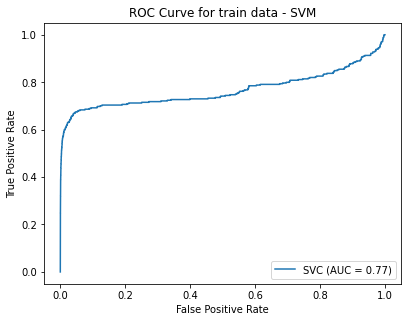

 
Classifier metrics for SVM on test data


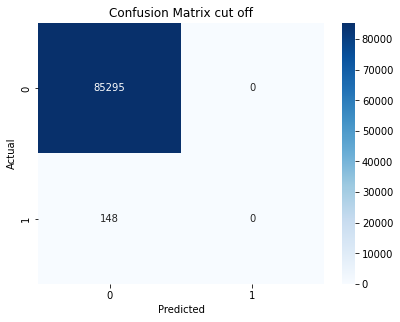

Recall/Sensitivity -  0.0
F1 score - 0.0
Precision -  0.0
Accuracy - 0.9982678510820079
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case            | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:----------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data | SVM                 | 0.00592946  |              0.765431 |             0.755157 |


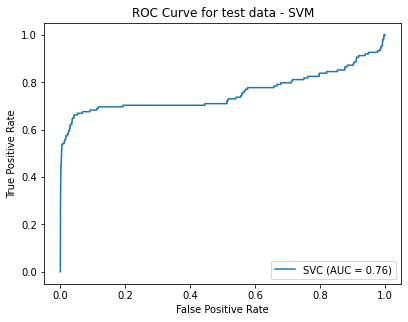

In [ ]:
df_results,best_svc_im = buildSVClassifier(df_results,"Imbalanced Data",X_train,y_train,X_test,y_test)

Due to the time and computation requirements of SVM, we built the model with default parameters without performing any hyperparameter tuning. We can see the model has performed quite badly with lowest scores so far. In further cases where we handle imbalance in the dataset, we will not build SVM Classifiers.

In [ ]:
#not using since model takes too long to build
#df_results,best_knn = buildKNNClassifier(df_results,"Imbalanced Data",X_train,y_train,X_test,y_test)

The KNN Model took extremely long to complete. This is one of the drawbacks of KNN model, it is slow when the number of datapoints is too high. We will not be using KNN models in further scenarios.

### XG Boost with Imbalanced dataset

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.2min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
 
Time taken to build the model : 1294.8813343048096 seconds
 
Classifier metrics for XGB on train data


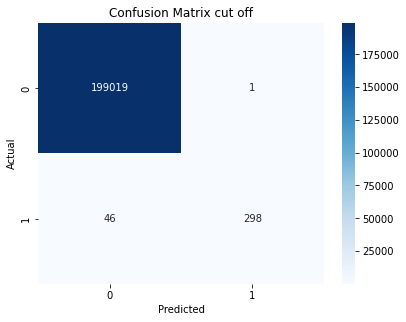

Recall/Sensitivity -  0.8662790697674418
F1 score - 0.926905132192846
Precision -  0.9966555183946488
Accuracy - 0.9997642503160049
Specificity -  0.9999949753793589
False Positive Rate -  5.024620641141594e-06
----------------------------------------------------------------------


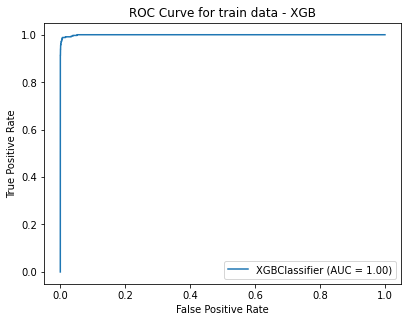

 
Classifier metrics for XGB on test data


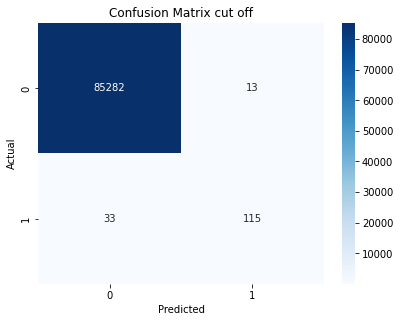

Recall/Sensitivity -  0.777027027027027
F1 score - 0.8333333333333333
Precision -  0.8984375
Accuracy - 0.9994616293903538
Specificity -  0.9998475877835746
False Positive Rate -  0.00015241221642534733
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case            | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:----------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbalanced Data | XG Boost            

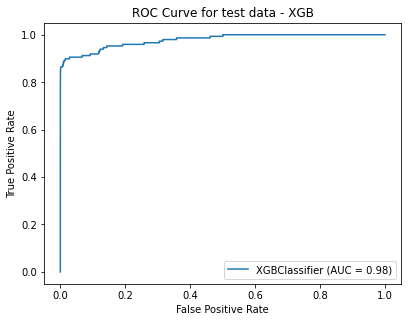

In [ ]:
df_results,best_xgb_im = buildXGBClassifier(df_results,"Imbalanced Data",X_train,y_train,X_test,y_test)

We see the score is higher than logistic regression, time taken is lesser than random forest algorithm. However, we can see there is a slight gap between train and test scores. 

In [ ]:
df_results

,Case,Model,Threshold,Train AUC-ROC score,Test AUC-ROC score
0,Imbalanced Data,Logistic Regression,0.000024,0.974339,0.965798
1,Imbalanced Data,Decision Tree,0.000022,0.984746,0.885370
2,Imbalanced Data,Random Forest,0.080007,0.999992,0.970784
3,Imbalanced Data,SVM,0.005929,0.765431,0.755157
4,Imbalanced Data,XG Boost,0.004136,0.999444,0.977871


Observation Summary : 

- We can observe decision tree and random forest are clearly overfitting. 
- The score for SVC classifier is very low. However, this model was just built on the default hyperparameters without tuning to reduce the run time. We will not be building this model for over sampled data sets.
- Logistic Regression and XG Boost scores are considerably good. XG Boost is the model with highest scores. We will consider this model to look at the most important features.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
#choosing the XGBoost model as the best model so far to look at the important features
clf = best_xgb_im

Top var = 17
2nd Top var = 14
3rd Top var = 27


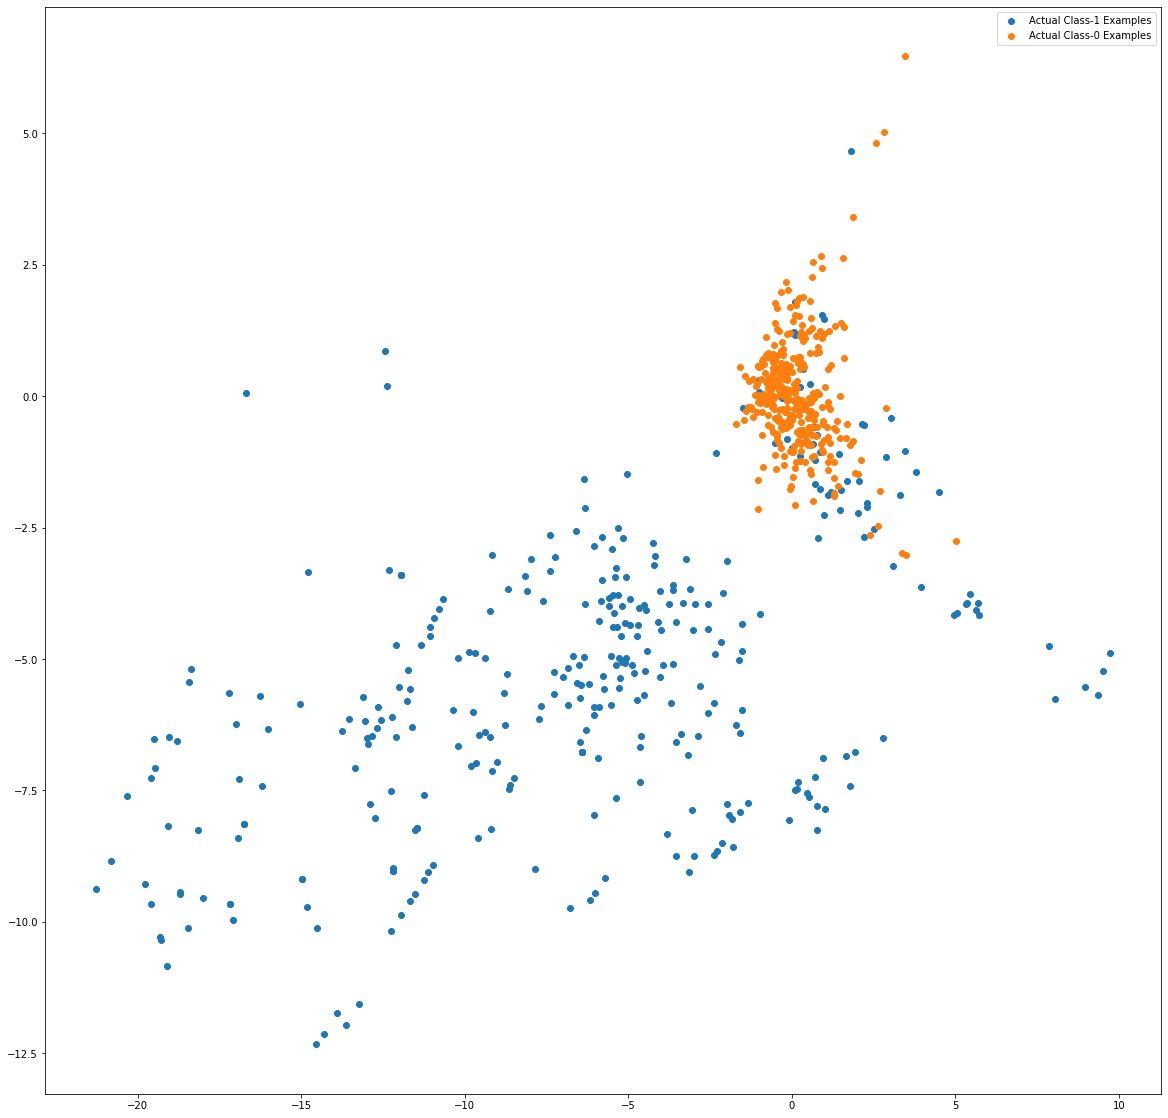

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

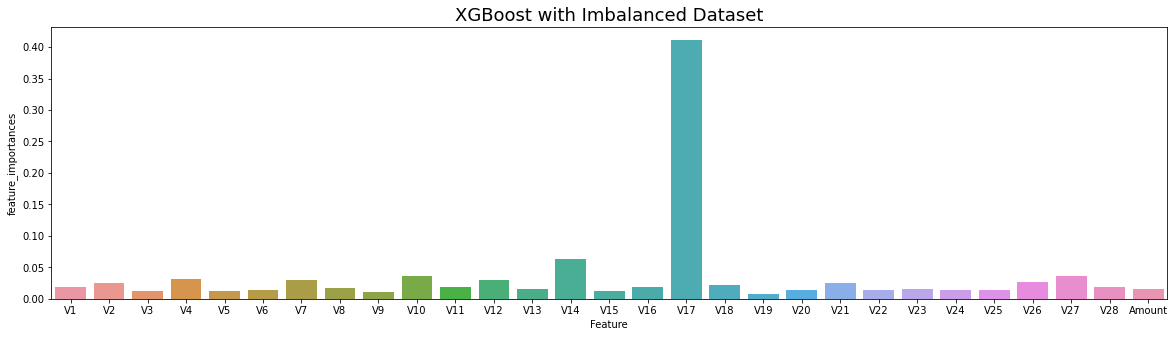

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(clf.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Imbalanced Dataset", fontsize=18)

plt.show()

As observed before, v17, v14 and v27 are the top 3 variables in the same order.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Random Oversampling

In [ ]:
#using the imblearn library's Random OverSampler for performing random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
#storing the oversampled dataset into new variables
X_over, y_over = ros.fit_resample(X_train, y_train)

### Logistic Regression with Random Oversampling

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.7s finished


LogisticRegression(C=0.01, class_weight={0: 0.9, 1: 0.01}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Time taken to build the model : 46.405386209487915 seconds
 
Classifier metrics for Logistic Regression on train data


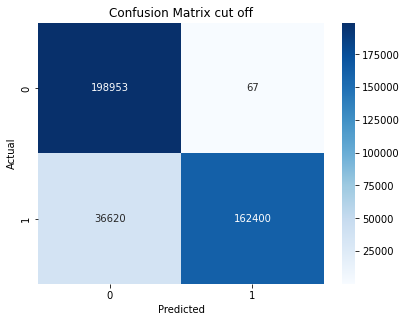

Recall/Sensitivity -  0.8159983921213948
F1 score - 0.8985108731434325
Precision -  0.9995876085605077
Accuracy - 0.9078308712692191
Specificity -  0.9996633504170435
False Positive Rate -  0.0003366495829564868
----------------------------------------------------------------------


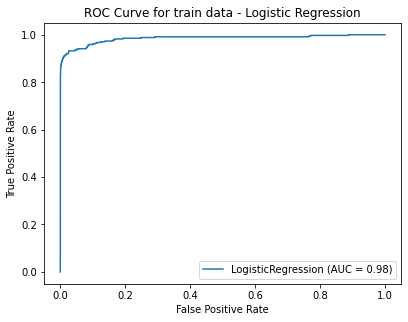

 
Classifier metrics for Logistic Regression on test data


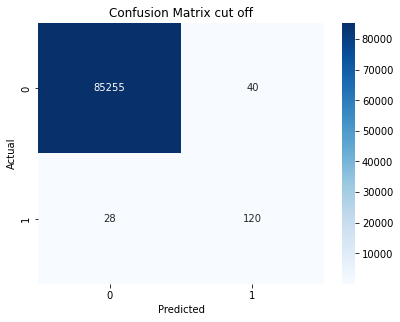

Recall/Sensitivity -  0.8108108108108109
F1 score - 0.7792207792207791
Precision -  0.75
Accuracy - 0.999204147794436
Specificity -  0.9995310393340758
False Positive Rate -  0.0004689606659241456
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbalanced Data     

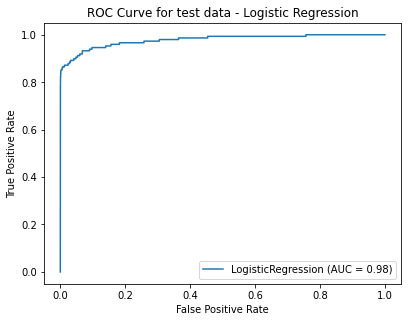

In [ ]:
df_results, best_log_over = buildLogisticRegression(df_results,"Random Oversampling",X_over,y_over,X_test,y_test)

Here again we observe while the model isn't overfitting and is doing considerably well, we can expect better results with models such as XGBoost. Lets try some other models with the oversampled dataset.

### Decision Tree with Random Oversampling

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.7min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.9, 1: 0.01},
                       criterion='gini', max_depth=25, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
 
Time taken to build the model : 236.1892557144165 seconds
 
Classifier metrics for Decision Tree on train data


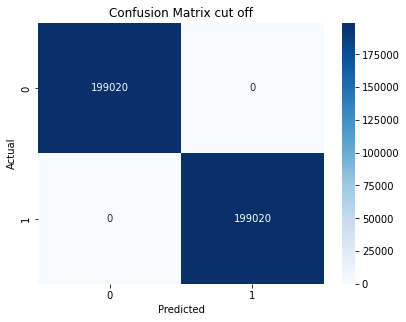

Recall/Sensitivity -  1.0
F1 score - 1.0
Precision -  1.0
Accuracy - 1.0
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


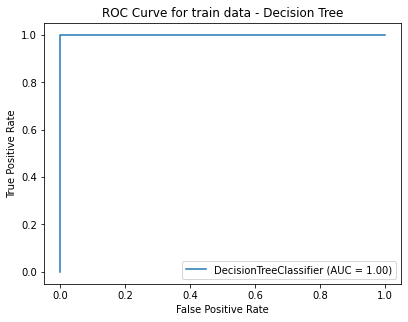

 
Classifier metrics for Decision Tree on test data


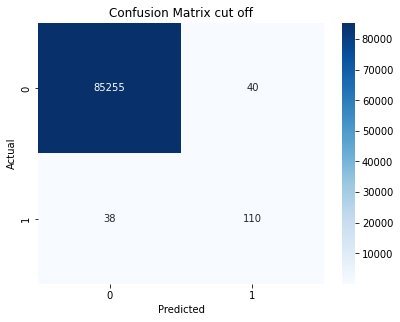

Recall/Sensitivity -  0.7432432432432432
F1 score - 0.738255033557047
Precision -  0.7333333333333333
Accuracy - 0.9990871107053826
Specificity -  0.9995310393340758
False Positive Rate -  0.0004689606659241456
----------------------------------------------------------------------
 
Saving results on test dataset
                  Case                Model  Threshold  Train AUC-ROC score  \
0      Imbalanced Data  Logistic Regression   0.000024             0.974339   
1      Imbalanced Data        Decision Tree   0.000022             0.984746   
2      Imbalanced Data        Random Forest   0.080007             0.999992   
3      Imbalanced Data                  SVM   0.005929             0.765431   
4      Imbalanced Data             XG Boost   0.004136             0.999444   
5  Random Oversampling  Logistic Regression   0.010185             0.984860   
6  Random Oversampling        Decision Tree   1.000000             1.000000   

   Test AUC-ROC score  
0            0.965798  
1   

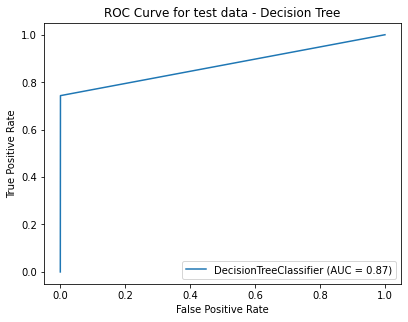

In [ ]:
df_results,best_dt_over = buildDecisionTreeClassifier(df_results,"Random Oversampling",X_over,y_over,X_test,y_test)

We observe the decision tree model is clearly overfitting which is one of the main pitfall of decision tree.

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 50.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.01}, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
 
Time taken to build the model : 3232.477011203766 seconds
 
Classifier metrics for Random Forest on train data


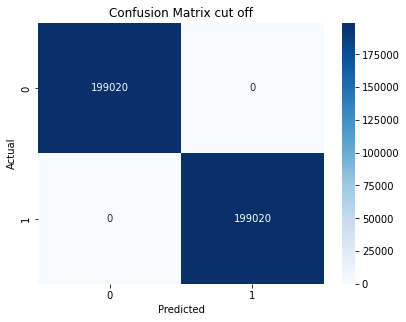

Recall/Sensitivity -  1.0
F1 score - 1.0
Precision -  1.0
Accuracy - 1.0
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


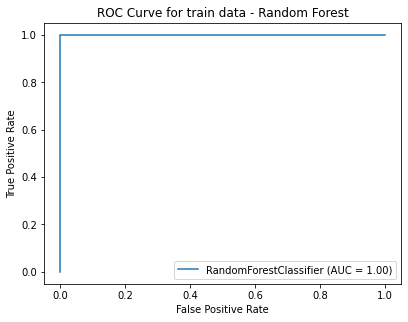

 
Classifier metrics for Random Forest on test data


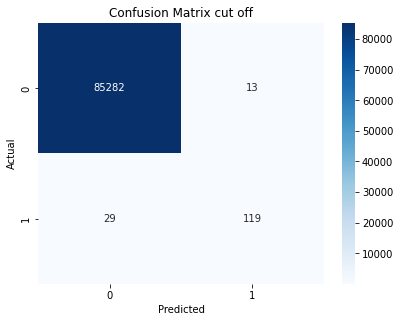

Recall/Sensitivity -  0.8040540540540541
F1 score - 0.85
Precision -  0.9015151515151515
Accuracy - 0.9995084442259752
Specificity -  0.9998475877835746
False Positive Rate -  0.00015241221642534733
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbalanced Data   

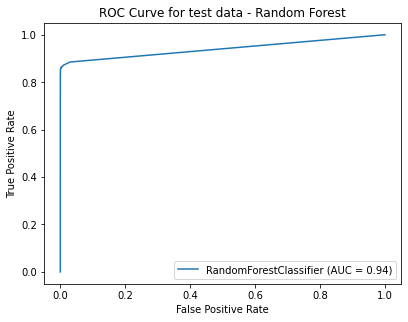

In [ ]:
df_results,best_rf_over = buildRandomForestClassifier(df_results,"Random Oversampling",X_over,y_over,X_test,y_test)

While the random forest does better than decision tree on the test dataset. It still is clearly overfitting. Lets check the XG Boost model for the oversampled dataset. Here again, we will skip KNN and also SVM due to the time required for its model building.

In [ ]:
#not using since the model takes too long to build
#df_results = buildSVClassifier(df_results,"Random Oversampling",X_over,y_over,X_test,y_test)

In [ ]:
#not using since the model takes too long to build
#df_results = buildKNNClassifier(df_results,"Random Oversampling",X_over,y_over,X_test,y_test)

### XG Boost with Random Oversampling

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 39.6min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
 
Time taken to build the model : 2548.964959859848 seconds
 
Classifier metrics for XGB on train data


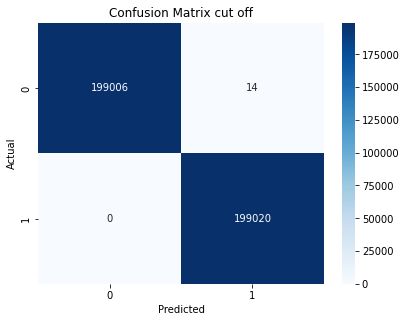

Recall/Sensitivity -  1.0
F1 score - 0.9999648288925622
Precision -  0.9999296602590512
Accuracy - 0.999964827655512
Specificity -  0.9999296553110241
False Positive Rate -  7.034468897598231e-05
----------------------------------------------------------------------


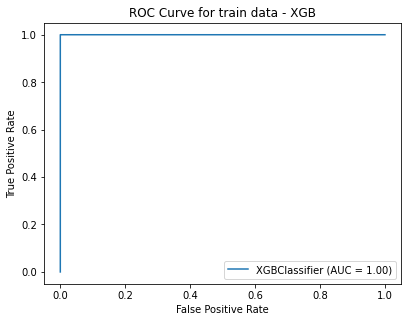

 
Classifier metrics for XGB on test data


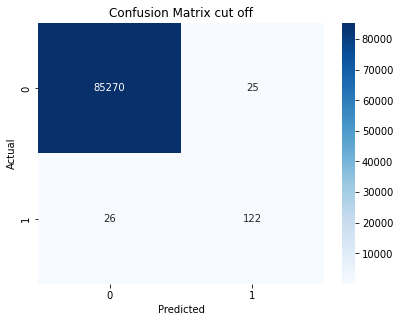

Recall/Sensitivity -  0.8243243243243243
F1 score - 0.8271186440677967
Precision -  0.8299319727891157
Accuracy - 0.999403110845827
Specificity -  0.9997068995837974
False Positive Rate -  0.000293100416202591
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbalan

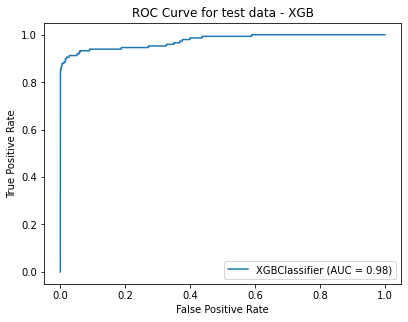

In [ ]:
df_results,best_xgb_over = buildXGBClassifier(df_results,"Random Oversampling",X_over,y_over,X_test.values,y_test.values)

The XGBoost model while performs better than even random forest on the test dataset, it is still overfitting. 

We can hence conclude random oversampling is not the best way to handle class imbalance in the dataset. Let's generate synthetic datapoints using SMOTE and ADASYN and compare the performances of the same set of models.

In [ ]:
df_results

,Case,Model,Threshold,Train AUC-ROC score,Test AUC-ROC score
0,Imbalanced Data,Logistic Regression,0.000024,0.974339,0.965798
1,Imbalanced Data,Decision Tree,0.000022,0.984746,0.885370
2,Imbalanced Data,Random Forest,0.080007,0.999992,0.970784
3,Imbalanced Data,SVM,0.005929,0.765431,0.755157
4,Imbalanced Data,XG Boost,0.004136,0.999444,0.977871
5,Random Oversampling,Logistic Regression,0.010185,0.984860,0.977886
6,Random Oversampling,Decision Tree,1.000000,1.000000,0.871387
7,Random Oversampling,Random Forest,0.990393,1.000000,0.940408
8,Random Oversampling,XG Boost,0.994900,1.000000,0.975180


## SMOTE 
Lets try using SMOTE technique to generate synthetic samples for minority class since the dataset is highly imbalanced.

### Class distribution after applying SMOTE 

Lets look at the class distribution after applying SMOTE

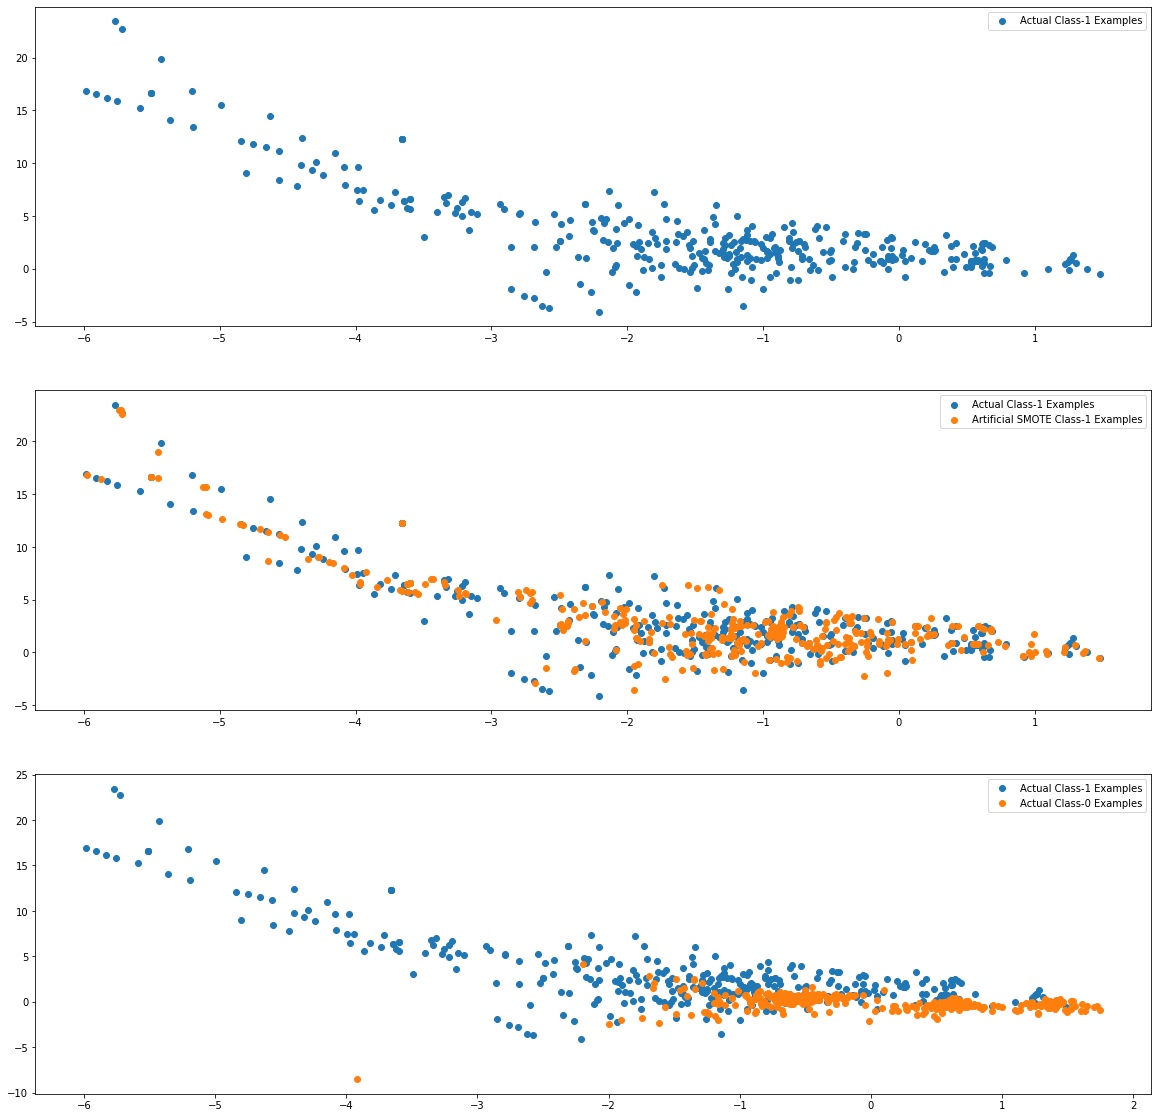

In [ ]:
#visualize class distribution
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)

#storing the datapoints oversampled using smote technique into a new variable
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression with SMOTE

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.7s finished


LogisticRegression(C=0.01, class_weight={0: 0.9, 1: 0.01}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Time taken to build the model : 47.7038848400116 seconds
 
Classifier metrics for Logistic Regression on train data


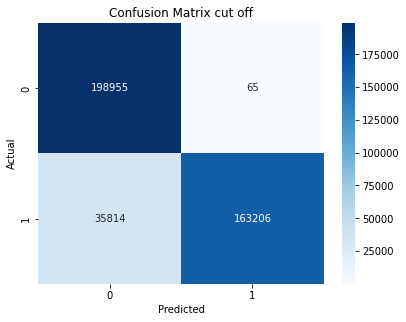

Recall/Sensitivity -  0.8200482363581549
F1 score - 0.9009663502543535
Precision -  0.9996018888841252
Accuracy - 0.9098608180082404
Specificity -  0.9996733996583258
False Positive Rate -  0.0003266003416742036
----------------------------------------------------------------------


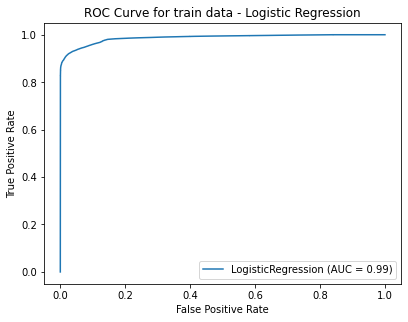

 
Classifier metrics for Logistic Regression on test data


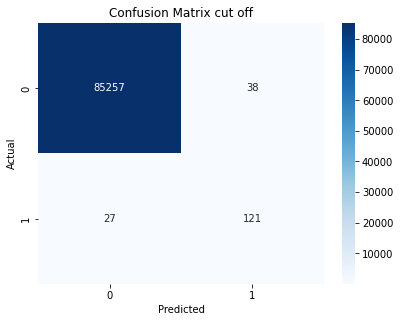

Recall/Sensitivity -  0.8175675675675675
F1 score - 0.7882736156351792
Precision -  0.7610062893081762
Accuracy - 0.9992392589211521
Specificity -  0.9995544873673721
False Positive Rate -  0.00044551263262793833
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imba

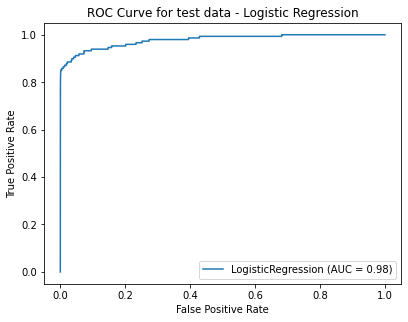

In [ ]:
df_results,best_log_sm = buildLogisticRegression(df_results,"SMOTE",X_train_smote, y_train_smote,X_test,y_test)

Logistic regression model has given the best results so far compared to imbalanced and oversampled dataset. Again even though it has decent score, we can target for better scores. 

### Decision Tree with SMOTE

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.5min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.9, 1: 0.01},
                       criterion='gini', max_depth=20, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
 
Time taken to build the model : 419.9029140472412 seconds
 
Classifier metrics for Decision Tree on train data


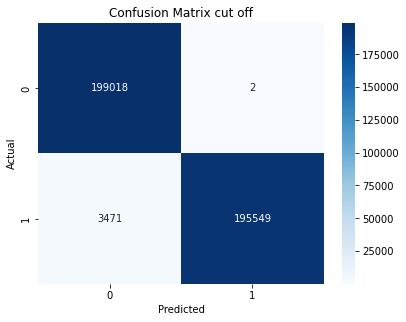

Recall/Sensitivity -  0.9825595417545975
F1 score - 0.9911980353345785
Precision -  0.9999897724890182
Accuracy - 0.9912747462566576
Specificity -  0.9999899507587178
False Positive Rate -  1.0049241282283188e-05
----------------------------------------------------------------------


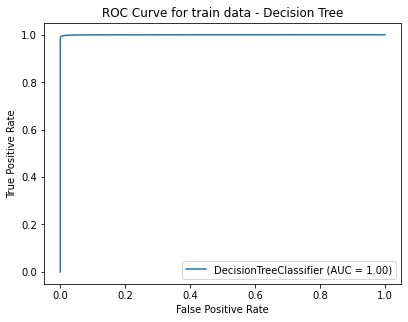

 
Classifier metrics for Decision Tree on test data


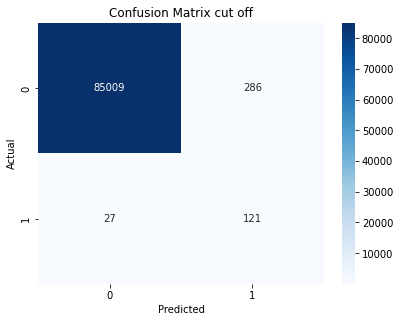

Recall/Sensitivity -  0.8175675675675675
F1 score - 0.4360360360360361
Precision -  0.2972972972972973
Accuracy - 0.9963367391126248
Specificity -  0.9966469312386423
False Positive Rate -  0.0033530687613576413
----------------------------------------------------------------------
 
Saving results on test dataset
                   Case                Model  Threshold  Train AUC-ROC score  \
0       Imbalanced Data  Logistic Regression   0.000024             0.974339   
1       Imbalanced Data        Decision Tree   0.000022             0.984746   
2       Imbalanced Data        Random Forest   0.080007             0.999992   
3       Imbalanced Data                  SVM   0.005929             0.765431   
4       Imbalanced Data             XG Boost   0.004136             0.999444   
5   Random Oversampling  Logistic Regression   0.010185             0.984860   
6   Random Oversampling        Decision Tree   1.000000             1.000000   
7   Random Oversampling        Random Forest

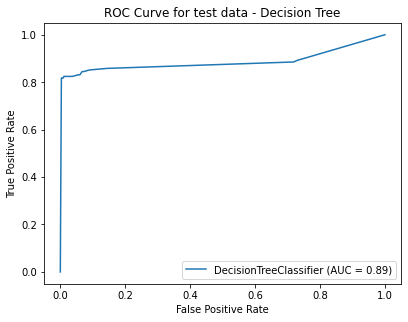

In [ ]:
df_results,best_dt_sm = buildDecisionTreeClassifier(df_results,"SMOTE",X_train_smote, y_train_smote,X_test,y_test)

The decision tree is still overfitting even though the gap between train and test scores is lesser compared to the other decision tree models.

### Random Forest with SMOTE

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 67.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.01}, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
 
Time taken to build the model : 4339.248482227325 seconds
 
Classifier metrics for Random Forest on train data


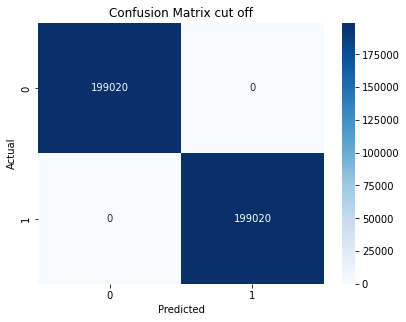

Recall/Sensitivity -  1.0
F1 score - 1.0
Precision -  1.0
Accuracy - 1.0
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


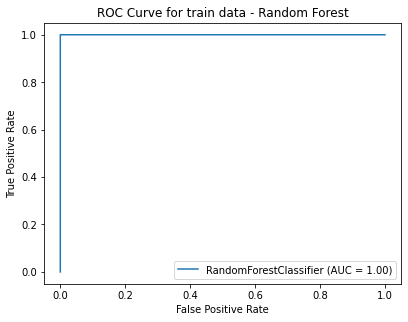

 
Classifier metrics for Random Forest on test data


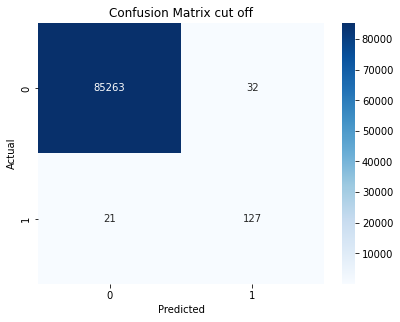

Recall/Sensitivity -  0.8581081081081081
F1 score - 0.8273615635179155
Precision -  0.7987421383647799
Accuracy - 0.9993797034280163
Specificity -  0.9996248314672607
False Positive Rate -  0.00037516853273931647
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imba

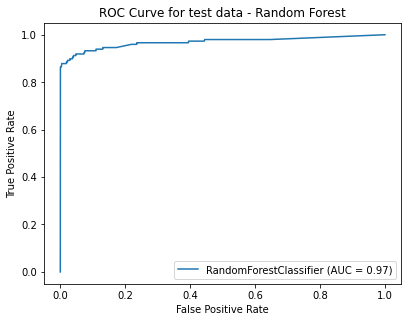

In [ ]:
df_results,best_rf_sm = buildRandomForestClassifier(df_results,"SMOTE",X_train_smote, y_train_smote,X_test,y_test)

Here again Random forest is performing better than decision tree as we can expect. Yet it is overfitting. Lets check the XG Boost model.

### XGBoost with SMOTE

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 56.6min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
 
Time taken to build the model : 3712.5165555477142 seconds
 
Classifier metrics for XGB on train data


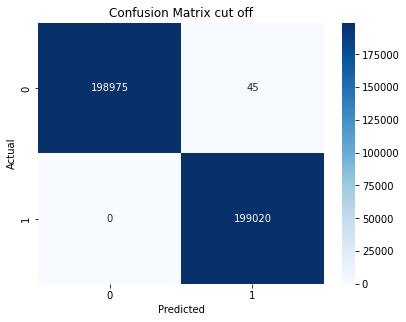

Recall/Sensitivity -  1.0
F1 score - 0.9998869588153284
Precision -  0.9997739431843871
Accuracy - 0.9998869460355743
Specificity -  0.9997738920711486
False Positive Rate -  0.0002261079288513717
----------------------------------------------------------------------


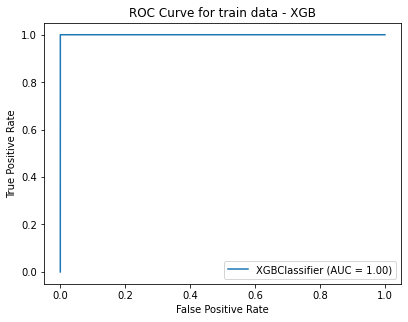

 
Classifier metrics for XGB on test data


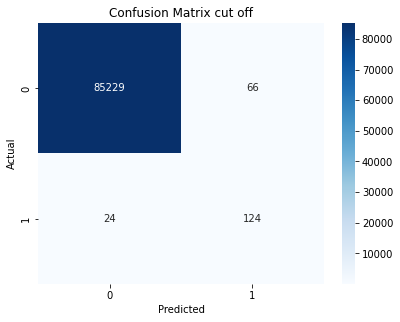

Recall/Sensitivity -  0.8378378378378378
F1 score - 0.7337278106508875
Precision -  0.6526315789473685
Accuracy - 0.9989466661985184
Specificity -  0.9992262149012252
False Positive Rate -  0.0007737850987748402
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbal

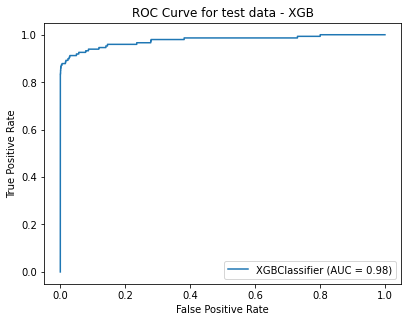

In [ ]:
df_results,best_xgb_sm = buildXGBClassifier(df_results,"SMOTE",X_train_smote,y_train_smote, X_test.values,y_test.values)

Lets compare the scores of the different models built

In [ ]:
df_results

,Case,Model,Threshold,Train AUC-ROC score,Test AUC-ROC score
0,Imbalanced Data,Logistic Regression,0.000024,0.974339,0.965798
1,Imbalanced Data,Decision Tree,0.000022,0.984746,0.885370
2,Imbalanced Data,Random Forest,0.080007,0.999992,0.970784
3,Imbalanced Data,SVM,0.005929,0.765431,0.755157
4,Imbalanced Data,XG Boost,0.004136,0.999444,0.977871
5,Random Oversampling,Logistic Regression,0.010185,0.984860,0.977886
6,Random Oversampling,Decision Tree,1.000000,1.000000,0.871387
7,Random Oversampling,Random Forest,0.990393,1.000000,0.940408
8,Random Oversampling,XG Boost,0.994900,1.000000,0.975180
9,SMOTE,Logistic Regression,0.009535,0.987055,0.977607


The XGBoost has given the best score on test dataset so far compared to the logisctic and random forest model which are the other two better performing model. 

## ADASYN
Lets use Adaptive Synthetic technique to generate sampels for minority classes.

### Class distribution after applying ADASYN

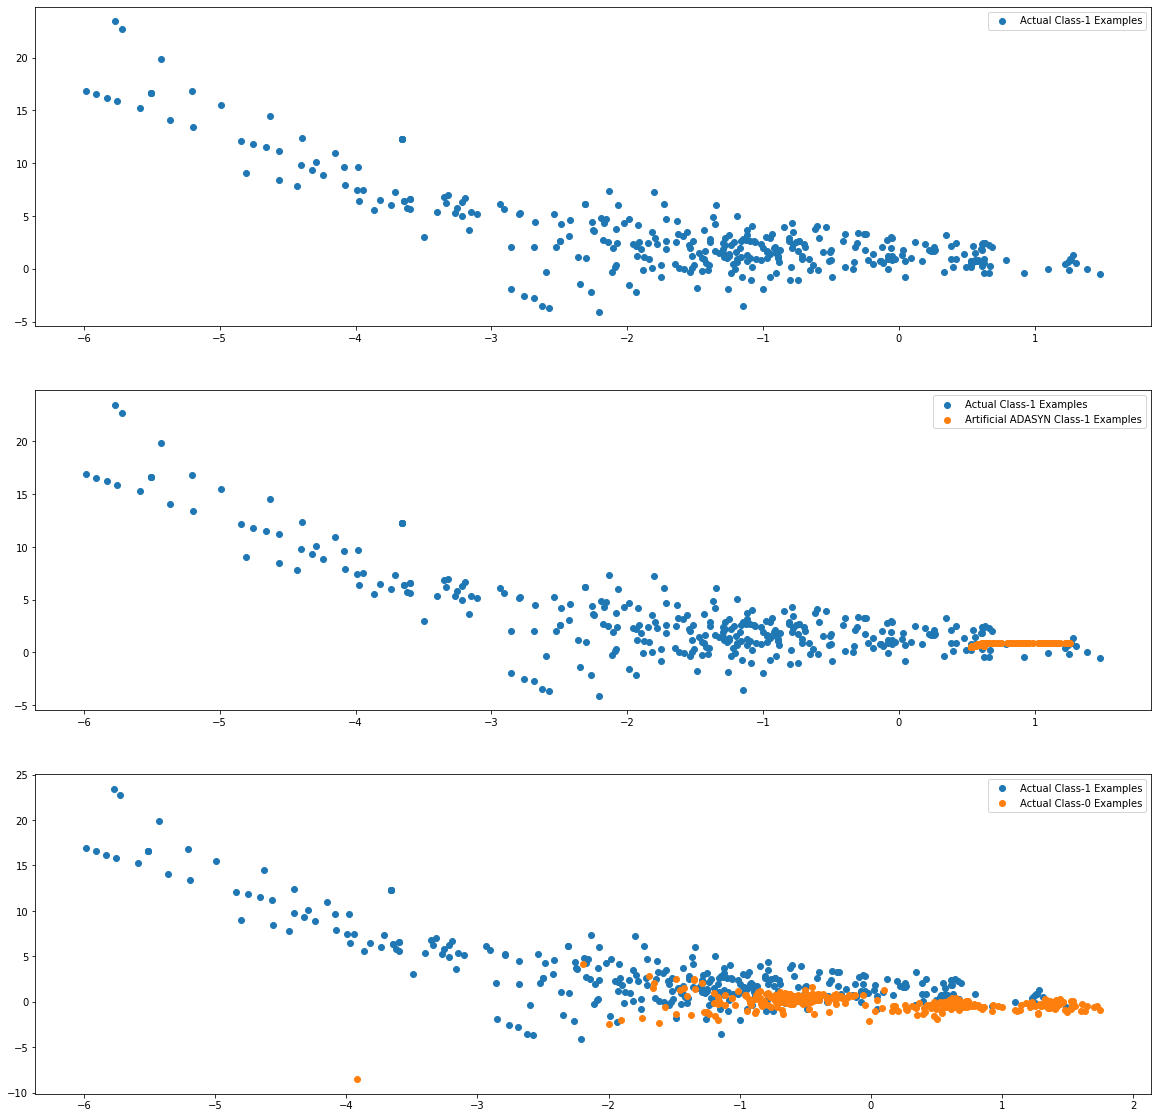

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
#the new distribution after applying ADASYN is stored into a new variable 
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression with ADASYN

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.1s finished


LogisticRegression(C=1000.0, class_weight={0: 0.9, 1: 0.01}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
 
Time taken to build the model : 44.188591957092285 seconds
 
Classifier metrics for Logistic Regression on train data


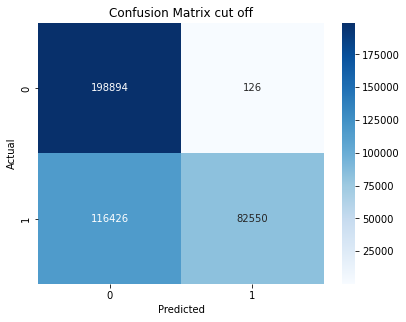

Recall/Sensitivity -  0.4148741556770666
F1 score - 0.5861843693636118
Precision -  0.9984759785185544
Accuracy - 0.7071528357068916
Specificity -  0.9993668977992162
False Positive Rate -  0.0006331022007838408
----------------------------------------------------------------------


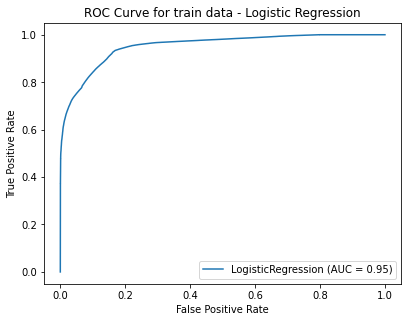

 
Classifier metrics for Logistic Regression on test data


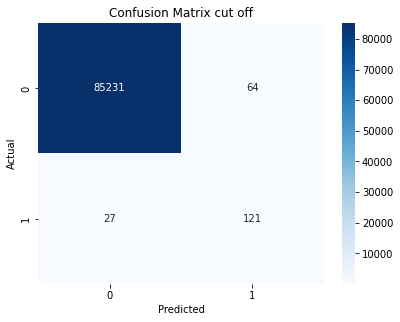

Recall/Sensitivity -  0.8175675675675675
F1 score - 0.7267267267267268
Precision -  0.654054054054054
Accuracy - 0.998934962489613
Specificity -  0.9992496629345213
False Positive Rate -  0.0007503370654786329
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbalan

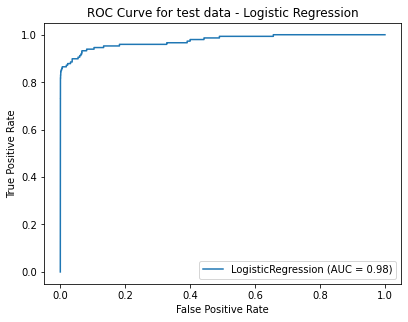

In [ ]:
df_results,best_log_ad = buildLogisticRegression(df_results,"ADASYN",X_train_adasyn, y_train_adasyn,X_test,y_test)

### Decision Tree with ADASYN

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.8min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.9, 1: 0.01},
                       criterion='gini', max_depth=20, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
 
Time taken to build the model : 436.6255748271942 seconds
 
Classifier metrics for Decision Tree on train data


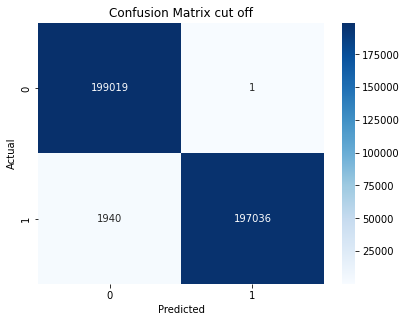

Recall/Sensitivity -  0.9902500804117079
F1 score - 0.9950986457515284
Precision -  0.9999949248110761
Accuracy - 0.995123066563483
Specificity -  0.9999949753793589
False Positive Rate -  5.024620641141594e-06
----------------------------------------------------------------------


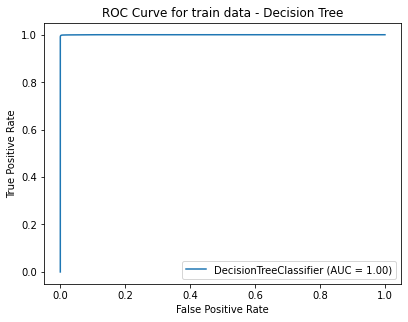

 
Classifier metrics for Decision Tree on test data


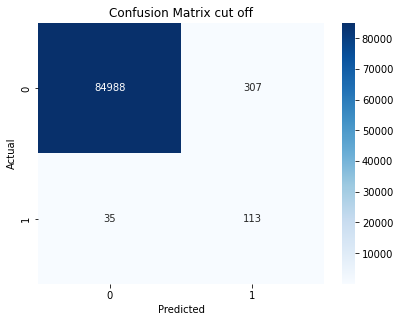

Recall/Sensitivity -  0.7635135135135135
F1 score - 0.3978873239436619
Precision -  0.26904761904761904
Accuracy - 0.9959973315543695
Specificity -  0.9964007268890321
False Positive Rate -  0.0035992731109678175
----------------------------------------------------------------------
 
Saving results on test dataset
                   Case                Model  Threshold  Train AUC-ROC score  \
0       Imbalanced Data  Logistic Regression   0.000024             0.974339   
1       Imbalanced Data        Decision Tree   0.000022             0.984746   
2       Imbalanced Data        Random Forest   0.080007             0.999992   
3       Imbalanced Data                  SVM   0.005929             0.765431   
4       Imbalanced Data             XG Boost   0.004136             0.999444   
5   Random Oversampling  Logistic Regression   0.010185             0.984860   
6   Random Oversampling        Decision Tree   1.000000             1.000000   
7   Random Oversampling        Random Fores

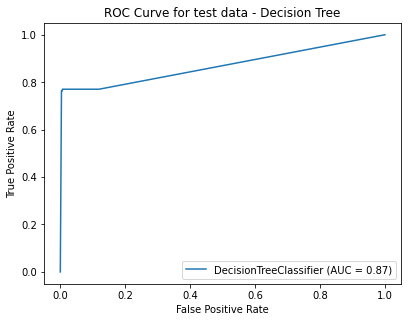

In [ ]:
df_results,best_dt_ad = buildDecisionTreeClassifier(df_results,"ADASYN",X_train_adasyn, y_train_adasyn,X_test,y_test)

### Random Forest with ADASYN

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 69.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.01}, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
 
Time taken to build the model : 4470.268111467361 seconds
 
Classifier metrics for Random Forest on train data


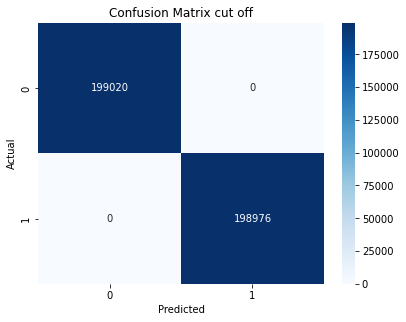

Recall/Sensitivity -  1.0
F1 score - 1.0
Precision -  1.0
Accuracy - 1.0
Specificity -  1.0
False Positive Rate -  0.0
----------------------------------------------------------------------


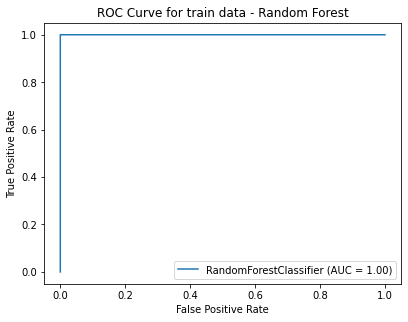

 
Classifier metrics for Random Forest on test data


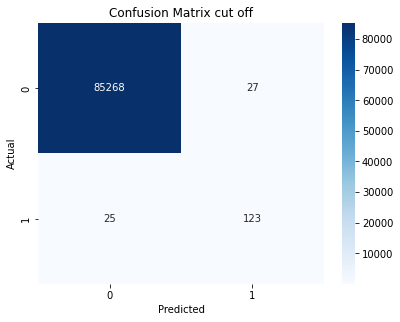

Recall/Sensitivity -  0.831081081081081
F1 score - 0.8255033557046979
Precision -  0.82
Accuracy - 0.9993914071369217
Specificity -  0.9996834515505012
False Positive Rate -  0.0003165484494987983
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbalanced Data     

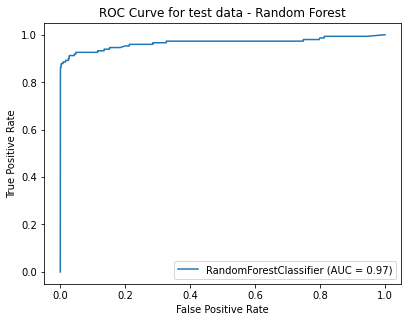

In [ ]:
df_results,best_rf_ad = buildRandomForestClassifier(df_results,"ADASYN",X_train_adasyn, y_train_adasyn,X_test,y_test)


In [ ]:
#df_results,best_svc = buildSVClassifier(df_results,"ADASYN",X_train_adasyn, y_train_adasyn,X_test,y_test)


In [ ]:
#df_results,best_knn = buildKNNClassifier(df_results,"ADASYN",X_train_adasyn, y_train_adasyn,X_test,y_test)


### XGBoost with ADASYN

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 57.1min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
 
Time taken to build the model : 3766.728581905365 seconds
 
Classifier metrics for XGB on train data


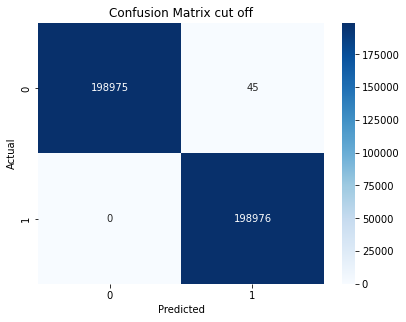

Recall/Sensitivity -  1.0
F1 score - 0.9998869338211093
Precision -  0.9997738932072495
Accuracy - 0.9998869335370205
Specificity -  0.9997738920711486
False Positive Rate -  0.0002261079288513717
----------------------------------------------------------------------


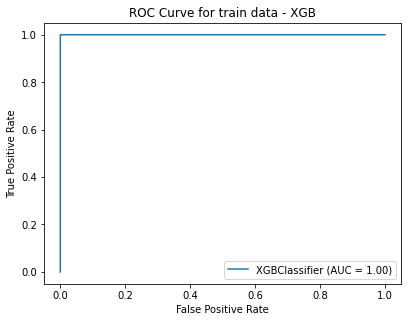

 
Classifier metrics for XGB on test data


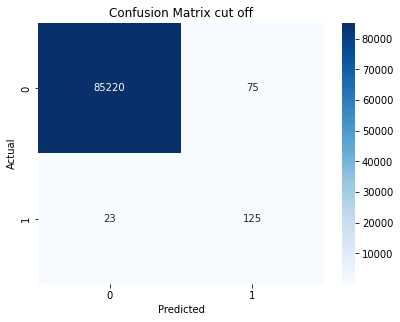

Recall/Sensitivity -  0.8445945945945946
F1 score - 0.7183908045977011
Precision -  0.625
Accuracy - 0.9988530365272755
Specificity -  0.9991206987513922
False Positive Rate -  0.000879301248607773
----------------------------------------------------------------------
 
Saving results on test dataset
|    | Case                | Model               |   Threshold |   Train AUC-ROC score |   Test AUC-ROC score |
|---:|:--------------------|:--------------------|------------:|----------------------:|---------------------:|
|  0 | Imbalanced Data     | Logistic Regression | 2.43848e-05 |              0.974339 |             0.965798 |
|  1 | Imbalanced Data     | Decision Tree       | 2.17434e-05 |              0.984746 |             0.88537  |
|  2 | Imbalanced Data     | Random Forest       | 0.080007    |              0.999992 |             0.970784 |
|  3 | Imbalanced Data     | SVM                 | 0.00592946  |              0.765431 |             0.755157 |
|  4 | Imbalanced Data    

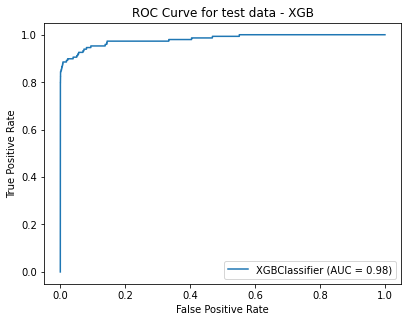

In [ ]:
df_results,best_xgb_ad = buildXGBClassifier(df_results,"ADASYN",X_train_adasyn,y_train_adasyn, X_test.values,y_test.values)

## Model comparision

In [ ]:
df_results

,Case,Model,Threshold,Train AUC-ROC score,Test AUC-ROC score
0,Imbalanced Data,Logistic Regression,0.000024,0.974339,0.965798
1,Imbalanced Data,Decision Tree,0.000022,0.984746,0.885370
2,Imbalanced Data,Random Forest,0.080007,0.999992,0.970784
3,Imbalanced Data,SVM,0.005929,0.765431,0.755157
4,Imbalanced Data,XG Boost,0.004136,0.999444,0.977871
5,Random Oversampling,Logistic Regression,0.010185,0.984860,0.977886
6,Random Oversampling,Decision Tree,1.000000,1.000000,0.871387
7,Random Oversampling,Random Forest,0.990393,1.000000,0.940408
8,Random Oversampling,XG Boost,0.994900,1.000000,0.975180
9,SMOTE,Logistic Regression,0.009535,0.987055,0.977607


As per the table above, we select XG Boost model with SMOTE technique for handling the imbalance in the dataset. Below are the main features of this model :
- XG Boost
- SMOTE technique used on training dataset to handle data imbalance
- Stratified KFold technique used for cross validation to maintain the class weights across the folds
- Randomized grid search was performed to reduce the run time of the grid search

Lets look at the best model and the evaluation metrics

## Final Model

In [ ]:
best_xgb_sm

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf = best_xgb_sm

clf.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Evaluation metrics for final model

Evaluation metrics for the selected best model
XG Boost train roc_value: 0.9999983397443575
XG Boost threshold: 0.7241986989974976
XG Boost test roc_value: 0.9762861167046641
------------------------------------------------------------


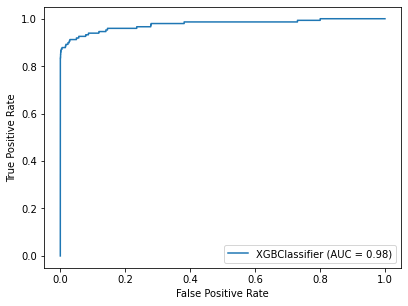

In [ ]:

y_train_prob = clf.predict_proba(X_train_smote)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
y_train_roc_auc = roc_auc_score(y_train_smote,y_train_prob)
print("="*60)
print("Evaluation metrics for the selected best model")
print("="*60)
print("XG Boost train roc_value: {0}" .format(y_train_roc_auc))
print("XG Boost threshold: {0}".format(threshold))

y_test_prob = clf.predict_proba(X_test.values)[:, 1]
y_test_roc_auc = roc_auc_score(y_test.values, y_test_prob)

print("XG Boost test roc_value: {0}" .format(y_test_roc_auc))
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_test_prob)
print("-"*60)
plt.rcParams['figure.figsize'] = [6.4, 4.8]
plot_roc_curve(clf, X_test.values, y_test.values);

### Class distribution (Class 0 vs Class 1)

Let's look at the important variables as defined by the selected model.

Top var = 14
2nd Top var = 4
3rd Top var = 8


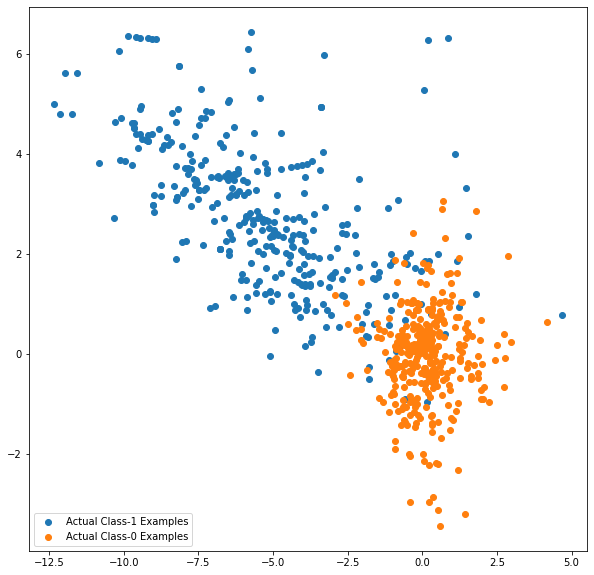

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Visual representation of feature importance as per final model

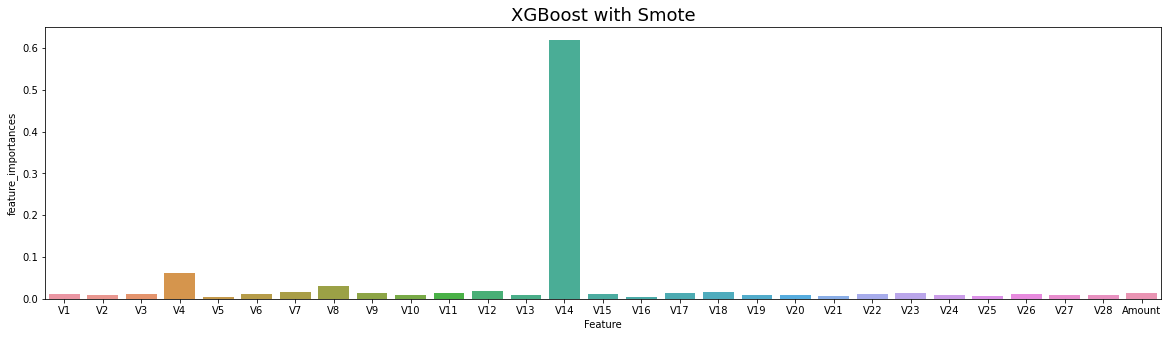

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(clf.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Smote", fontsize=18)

plt.show()

#### Other models and observations

In [ ]:
df_results

,Case,Model,Threshold,Train AUC-ROC score,Test AUC-ROC score
0,Imbalanced Data,Logistic Regression,0.000024,0.974339,0.965798
1,Imbalanced Data,Decision Tree,0.000022,0.984746,0.885370
2,Imbalanced Data,Random Forest,0.080007,0.999992,0.970784
3,Imbalanced Data,SVM,0.005929,0.765431,0.755157
4,Imbalanced Data,XG Boost,0.004136,0.999444,0.977871
5,Random Oversampling,Logistic Regression,0.010185,0.984860,0.977886
6,Random Oversampling,Decision Tree,1.000000,1.000000,0.871387
7,Random Oversampling,Random Forest,0.990393,1.000000,0.940408
8,Random Oversampling,XG Boost,0.994900,1.000000,0.975180
9,SMOTE,Logistic Regression,0.009535,0.987055,0.977607


Other models that have also performed considerably well :

- XG Boost with Imbalanced dataset, ADASYN 
- Logistic Regression with Random Oversampling


Other observations : 
- Even though Logistic regression has slightly lower scores, the time taken is the lowest of all.
- Decision tree overfits for most scenarios
- Both Random forest and XG Boost overfit in case of random oversampling which stands to show the importance of generating synthetic datapoints based on the actual values instead of random oversampling.
